Import libraries 

In [107]:
# Add environment Packages paths to conda
import warnings
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

# Text preprocessing packages
import re # Regex Package
import regex
import emoji
# Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.
import arabicstopwords.arabicstopwords as stp #more range of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

# Evaluation Packages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# ML Packages
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



# Save the model
import joblib

In [5]:
df = pd.read_csv('Processed_Training_set.csv')
dfTest = pd.read_csv('Filtered_Processed_Testing_set.csv')
df.head()

words emotion
0  #ŸÖŸÜ_ÿ¨ŸÖÿßŸÑ_ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ...     joy
1  #ŸÖŸÜÿßÿ±Ÿá_ÿßŸÑÿ≠ÿØÿ®ÿßÿ° Ÿáÿ∞ÿß ÿßŸÑÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ŸÑÿß ÿ´Ÿàÿ±ÿ© ÿπÿ¥ÿßÿ¶ÿ± ...   anger
2  ‚Å¶ŸÖÿ±ÿ≠ÿ®ÿß ÿ£ŸÜÿ™Ÿä ÿ¨ŸÖŸäŸÑŸá ŸàŸáŸÜÿßŸÉ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ®ŸÉ ŸÉŸàŸÜŸä ÿ≥ÿπŸäÿØŸá ÿØÿß...     joy
3  #ÿπŸàÿØŸá_ÿßÿÆÿ∑ÿ±_ŸÖÿπŸÑŸÖŸäŸÜ_ŸÅŸä_ÿßŸÑÿπÿßŸÑŸÖ\nŸàÿπŸÑŸäŸÉŸÖ ÿßŸÑÿ≥ŸÑÿßŸÖ ÿßŸäŸà...     joy
4  #ÿ∫ÿ±ÿßÿ®ŸäŸäÿ®_ÿ≥ŸàÿØ\nŸÑŸÖ ÿ£ÿ™ÿßÿ®ÿπŸá ŸÑŸÉŸÜ ÿ£ÿ±Ÿâ ÿßŸÑŸÉÿ´Ÿäÿ± ŸÜÿßŸÇŸÖŸäŸÜ ...   anger

In [6]:
dfTest.head()

words  emotion
0  ÿ•ŸÜŸáÿß ÿπŸÑŸâ Ÿàÿ¥ŸÉ ÿßŸÜ ÿ™ÿµÿ®ÿ≠ ÿßŸÑÿ≥ÿßÿ®ÿπŸá ŸàŸÜÿµŸÅ ÿµÿ®ÿßÿ≠ÿß Ÿàÿ£ŸÜÿ™ Ÿà...  sadness
1   ŸÉŸÑ ÿßŸÑŸä ÿßŸÇÿØÿ± ÿßŸÇŸàŸÑŸá. ŸÉÿ±Ÿáÿ™ŸÉ ŸàŸÑŸäÿ™ŸÜŸä ŸÖÿß ÿπÿ±ŸÅÿ™ŸÉ. \n#ŸÜÿØŸÖ  sadness
2                          ÿßÿØÿ±Ÿä ÿ®ÿ≥ ÿ®ÿØŸàŸÜ ÿµÿ±ÿßÿÆ ÿßÿ≤ÿπÿ¨ÿ™ŸÜŸä  sadness
3  ŸÖÿ≠ÿ™ÿßÿ¨ÿ© ŸÉÿßÿ¶ŸÜ Ÿäÿ¥ÿßÿ±ŸÉŸÜŸä ÿßŸàŸÇÿßÿ™Ÿä ÿ±ÿ≥ŸÖ ŸÑŸàÿ≠ÿ© ŸÑÿ≠ÿ∏ÿ© ŸÜÿ±ŸÅÿ≤ÿ©...  sadness
4  ÿ®ÿ¨ÿØ ÿßŸäŸá ÿßŸÑŸÉŸàŸÜÿ≥ÿ®ÿ™ ÿßŸÑ ÿ®ŸäÿÆŸÑŸäŸÉŸâ ÿ™ŸÇŸÑÿπŸâ ÿßŸÑÿ∑ÿ±ÿ≠Ÿá ŸäŸàŸÖ ÿÆ...    anger

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16014 entries, 0 to 16013
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   words    16014 non-null  object
 1   emotion  16014 non-null  object
dtypes: object(2)
memory usage: 250.3+ KB


In [8]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   words    2145 non-null   object
 1   emotion  2145 non-null   object
dtypes: object(2)
memory usage: 33.6+ KB


In [9]:
#print the number of null values in each column
df.isnull().sum()

words      0
emotion    0
dtype: int64

In [10]:
dfTest.isnull().sum()

words      0
emotion    0
dtype: int64

In [164]:
#to get the index of the null value
df[df['words'].isnull() == True]

Empty DataFrame
Columns: [words, joy, sadness, anger, fear, disgust, surprise]
Index: []

In [11]:
#print the number of duplicated values 
df.duplicated().sum()

13

In [12]:
#print the rows which are duplicated
df[df['words'].duplicated() == True]

words   emotion
11310    ÿ±ÿπÿ®   sadness
11322    ÿ≥ÿÆÿ∑     anger
11431  ŸÖÿ™ÿ≠ŸÖÿ≥       joy
11465   ŸÖÿ±ÿπÿ®   sadness
11470  ŸÖÿ≥ÿ™ÿßÿ°   sadness
11508    Ÿàÿ¨ÿπ   sadness
11800   ÿ¨ŸÖŸäŸÑ       joy
11917   ÿ≥ÿπŸäÿØ       joy
11922   ÿ≥ŸÑÿßŸÖ       joy
12034   ÿ∫ÿ±Ÿäÿ®  surprise
12063    ŸÅÿÆÿ±       joy
12180  ŸÖÿ±ÿ™ÿßÿ≠       joy
12186   ŸÖÿ±ŸáŸÇ   sadness
12430  ÿßÿ≠ÿ®ÿßÿ∑   sadness
13021   ÿßŸÑŸÑŸá       joy
13881    ÿ´ŸÇŸÑ      fear
14029   ÿ≠ŸÖÿßÿ≥       joy
14511   ÿ∂Ÿäÿßÿπ   sadness
15076  ŸÖÿ®ÿ≥Ÿàÿ∑       joy
15259  ŸÖÿ±ŸáŸÇÿ©   sadness

In [13]:
dfTest[dfTest['words'].duplicated() == True]

words  emotion
1416  ÿ®ÿ™ÿ®ÿµŸàÿß ŸÑŸäŸáŸá ÿ®ÿ¥ŸÅŸÇÿ© ŸàŸÖÿßŸÑŸÉŸàÿß ŸÖÿ™ÿπÿßÿ∑ŸÅŸäŸÜ ÿ£ŸÜÿß ŸÖÿ¥ ÿ≠ÿ≤ŸäŸÜ...  sadness
1417  ÿ£ÿ®Ÿä ŸÇÿØ ÿ™ÿ±ŸÉÿ™ŸÜŸä Ÿàÿ≠ŸäÿØ ŸÅŸä ÿßŸÑÿØŸÜŸäÿß ŸÇÿØ ÿ™ÿ±ŸÉÿ™ŸÜŸä ÿ£ÿ≠ÿ™ÿßÿ¨ ŸÑ...  sadness
1422  #ÿπÿ™ÿßÿ® #ÿ∫Ÿäÿßÿ® #ŸÅÿ±ÿßŸÇ #ÿπÿ¥ŸÇ #ŸÇÿµÿßŸäÿØ #ÿ≠ÿ® - ÿ±ÿ¢ÿ≠Ÿà ŸàÿßŸÜÿß ...  sadness
1423  ŸÇÿßÿπÿØŸá ÿßÿπŸäÿ¥ ÿ¨Ÿà ÿ∫ÿ±Ÿäÿ® ÿ≠ÿßŸÑŸäÿß ŸÇÿ±ŸÅ ŸÖÿπ ÿßÿ¥ŸÖÿ¶ÿ≤ÿßÿ≤ ŸÖÿπ ÿ∫ÿ∂ÿ®...  sadness
1424      ŸÅŸä ŸÇÿßŸÜŸèŸàŸÜ ÿ∫Ÿäÿ±ÿ™Ÿä:\nÿßŸÑÿ∞ÿ®ÿ≠ ŸàŸÇÿ™ ÿßŸÑÿ∫ŸäŸêÿ±ÿ© ÿ≠ŸÑÿßŸÑ!! ??    anger
...                                                 ...      ...
2020  ÿ£ŸÖÿß ÿßŸÑŸäŸàŸÖ ŸÅŸÇÿØ ŸàÿµŸÑ ÿßŸÑÿπÿßŸÑŸÖ ŸÑÿØÿ±ÿ¨ÿ© ŸÖÿÆŸäŸÅÿ© ŸÅŸä ÿßŸÑÿßÿ≥ÿ™ÿÆ...    anger
2021  @aliimortada ŸáÿßŸä ŸÖÿ¥ ŸÑŸÖ_ŸÜŸÉŸÜ_ÿπŸÑŸâ_ÿπŸÑŸÖ ŸáÿßŸä ÿ®ŸÑÿßŸàŸä ŸÜ...    anger
2022  #ÿ≠ŸÅŸÑŸá_ŸÖÿßÿ¨ŸÜŸá_ÿ®ÿ¨ÿßŸÖÿπÿ©_ŸÜŸàÿ±Ÿá ÿ•ÿ∞ÿß ÿ∂ÿπŸÅ ÿßŸÑÿ•ŸäŸÖÿßŸÜ ÿ®ÿßŸÑŸÑŸá ...      joy
2023                    Ÿä ÿ±ÿ® ÿ•ÿ¨ÿπŸÑ ŸÜŸáÿßŸäÿ© ŸáÿßŸÑŸáŸÖ ŸÅÿ±ÿ≠ ?? ??      joy
2025  ?? ŸÖŸÜ ÿßŸÑŸÖÿ§ÿ≥ŸÅ ÿßŸÜ ŸÜÿ¨ÿØ ÿ≠ÿ™Ÿâ ÿßŸÑÿ¢ŸÜ #ÿßÿØÿßÿ±ÿ©_ÿßŸÑÿßÿ™ŸÅÿßŸÇ ÿ™ÿ∂...  sadness

[202 rows x 2 columns]

In [14]:
#removing duplicated values
index = df[df['words'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)

In [15]:
df[df['words'].duplicated() == True]

Empty DataFrame
Columns: [words, emotion]
Index: []

In [16]:
index = dfTest[dfTest['words'].duplicated() == True].index
dfTest.drop(index, axis = 0, inplace = True)

In [17]:
dfTest[dfTest['words'].duplicated() == True]

Empty DataFrame
Columns: [words, emotion]
Index: []

In [49]:
#are there any stop words in the data?
arabic_stopwords = stp.stopwords_list()
len(stp.stopwords_list())

13465

In [18]:
df['stop_words'] = df['words'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
df.stop_words.value_counts()

stop_words
0     6453
1     2685
2     2272
3     1772
4     1171
5      751
6      428
7      212
8      126
9       55
10      39
11      12
12      10
14       4
13       2
27       1
15       1
Name: count, dtype: int64

In [174]:
dfTest['stop_words'] = dfTest['words'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
dfTest.stop_words.value_counts()

stop_words
1     466
2     442
3     345
0     285
4     274
5     192
6     139
7      62
8      44
9      29
10     14
11      4
12      3
13      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

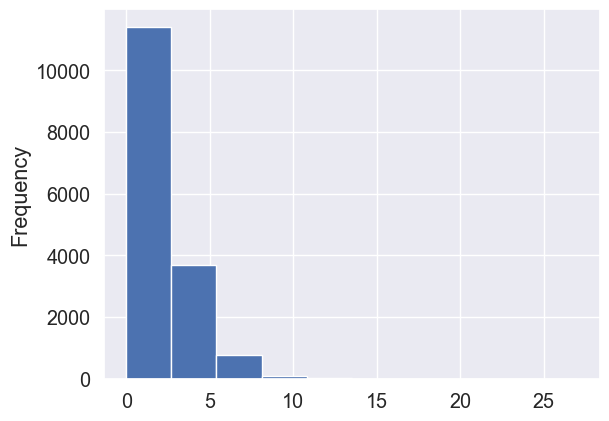

In [175]:
df['stop_words'].plot(kind= 'hist')

In [19]:
#to count the number of emojis in the dataset
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

df['emoji_count'] = df['words'].apply(lambda x: emoji_counter(x))
df.emoji_count.value_counts()[:10]

emoji_count
0    13267
1     1301
2      792
3      302
4      144
5       69
6       48
7       18
8       15
9       10
Name: count, dtype: int64

extract the emojis from every text


In [20]:
emojis_data = df[df['emoji_count'] > 0]

In [21]:
def extract_emoji(text):
    import emoji
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.distinct_emoji_list(char) for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [22]:
emojis_data['emoji'] = emojis_data['words'].apply(lambda x: extract_emoji(x))
emojis_data['emoji'] = emojis_data['emoji'].apply(lambda x: ' '.join([word for word in x ]))

In [23]:
emojis_data

words   emotion  \
0      #ŸÖŸÜ_ÿ¨ŸÖÿßŸÑ_ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ...       joy   
2      ‚Å¶ŸÖÿ±ÿ≠ÿ®ÿß ÿ£ŸÜÿ™Ÿä ÿ¨ŸÖŸäŸÑŸá ŸàŸáŸÜÿßŸÉ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ®ŸÉ ŸÉŸàŸÜŸä ÿ≥ÿπŸäÿØŸá ÿØÿß...       joy   
7      #ŸÅÿ±ÿ≠Ÿá_ŸÇŸÑÿ®ŸÉ_ÿ™ÿ™ŸÖÿ´ŸÑ_ŸÅŸä ÿ±ÿ∂ÿß ÿ±ÿ®ŸÜÿß Ÿà ÿ≠ÿ® ÿßŸÑŸÜÿßÿ≥ ÿßŸÑŸÑŸä ÿ≠...       joy   
10     #ŸÅÿ±ÿ≠ÿ™Ÿä_ŸÜÿ¨ÿßÿ≠Ÿä ŸÅŸä ŸÖÿ¨ÿ™ŸÖÿπŸÜÿß Ÿäÿ±ŸàŸÜ ÿ£ŸÜ ÿ•ŸÜÿ¨ÿßÿ® ÿßŸÑÿ∞ŸÉÿ± ÿ£ŸÖ...     anger   
11     <&lt; Ÿà  ŸÅÿ¨ÿßŸá !! ŸÉÿ±Ÿáÿ™ ÿ¥ÿÆÿµÿß ŸÑŸÖ ÿßÿ™ŸàŸÇÿπ ÿßŸÜ ÿßŸÉÿ±ŸáŸá Ÿä...  surprise   
...                                                  ...       ...   
11155  ÿ£ŸäŸÜÿπŸÖ ŸÖŸÉÿßŸÜÿ¥ ÿ≠ÿØ ŸÅŸäŸÜÿß ÿ∑ÿßŸäŸÇ ÿ≠ÿØ ÿßŸÑŸäŸàŸÖ ÿØŸá Ÿàÿ®Ÿäÿ¥ÿ™ŸÖŸàÿß ...       joy   
11158  ÿπŸÑŸä ŸÇÿØÿ± ÿßŸÑŸàÿßÿ≠ÿØ ŸäŸÉŸàŸÜ ŸÖÿ®ÿ≥Ÿàÿ∑ Ÿà ŸÖÿ™ŸÅÿßÿ¶ŸÑ\nÿπŸÑŸä ŸÇÿØÿ± ŸÖÿß...   sadness   
11159  ??üå∏ ÿßŸÑÿ≥ÿπÿßÿØŸá ŸÑŸäÿ≥ÿ™ ÿ≠ŸÑŸÖ Ÿà ŸÑÿß Ÿà⁄æŸÖ ŸàŸÑÿß ÿ®ÿ£ŸÖÿ± ŸÖÿ≠ÿßŸÑ ÿ®ŸÑ...       joy   
11160  #ÿ±Ÿäÿ≠_ÿßŸÑŸÖÿØÿßŸÖ\nÿßŸÑŸÉÿ®Ÿàÿ™ \n#ÿ®Ÿáÿ¨ÿ™ : ŸÉÿ®Ÿàÿ™ ÿßŸäŸá ...ÿ™ÿßÿ®Ÿà...       joy   
11163  ÿßŸÑÿßŸÉÿ™ŸÅÿßÿ° ÿ®ÿ¥ÿÆÿµ Ÿàÿßÿ≠ÿØ #ŸÖÿ™ÿπÿ© ŸÑÿß Ÿäÿπÿ±ŸÅŸáÿß #ÿßŸÑÿÆÿßÿ¶ŸÜŸàŸÜ üòâ...       joy   

       emoji_count    emoji  
0                4  üòé üòÇ üåö üíî  
2                1        üíò  
7                1        üôè  
10               1        ‚úã  
11               2      üòØ üíî  
...            ...      ...  
11155            1        ‚ù§  
11158            2      üò¢ üíî  
11159            2      üå∏ üå∫  
11160            3    üòÇ üëå üí™  
11163            2      üòâ üòâ  

[2727 rows x 4 columns]

In [181]:
#find most repeated emojis
pd.Series(' '.join(emojis_data['emoji']).split()).value_counts()[:10]

üòÇ     822
üíî     502
üò≠     327
üòç     235
‚ù§     219
‚ù§Ô∏è    170
üò†     148
üò¢     143
üò°     128
üòî      96
Name: count, dtype: int64

Cleaning

In [25]:
emojis = {
    "üôÇ":"ÿ∂ÿ≠ŸÉ",
    "ü§£":"ÿ∂ÿ≠ŸÉ",
    "üòÇ":"ÿ∂ÿ≠ŸÉ",
    "üíî":"ÿ≠ÿ≤ŸÜ",
    "üôÇ":"ÿ∂ÿ≠ŸÉ",
    "‚ù§Ô∏è":"ÿ≠ÿ®",
    "‚ù§":"ÿ≠ÿ®",
    "üòç":"ÿ≠ÿ®",
    "üò≠":"ÿ≠ÿ≤ŸÜ",
    "üò¢":"ÿ≠ÿ≤ŸÜ",
    "üòî":"ÿ≠ÿ≤ŸÜ",
    "‚ô•":"ÿ≠ÿ®",
    "üíú":"ÿ≠ÿ®",
    "üòÖ":"ÿ∂ÿ≠ŸÉ",
    "üôÅ":"ÿ≠ÿ≤ŸÜ",
    "üíï":"ÿ≠ÿ®",
    "üíô":"ÿ≠ÿ®",
    "üòû":"ÿ≠ÿ≤ŸÜ",
    "üòä":"ŸÅÿ±ÿ≠",
    "üëè":"ŸäÿµŸÅŸÇ",
    "üëå":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "üò¥":"ŸÜŸàŸÖ",
    "üòÄ":"ÿ∂ÿ≠ŸÉ",
    "üòå":"ÿ≠ÿ≤ŸÜ",
    "üåπ":"Ÿàÿ±ÿØÿ©",
    "üôà":"ÿ≠ÿ®",
    "üòÑ":"ÿ∂ÿ≠ŸÉ",
    "üòê":"ŸÖÿ≠ÿßŸäÿØ",
    "‚úå":"ŸÖŸÜÿ™ÿµÿ±",
    "‚ú®":"ŸÜÿ¨ŸÖŸá",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "üòè":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üòí":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üôÑ":"ŸÖŸÑŸÑ",
    "üòï":"ÿπÿµÿ®Ÿäÿ©",
    "üòÉ":"ÿ∂ÿ≠ŸÉ",
    "üå∏":"Ÿàÿ±ÿØÿ©",
    "üòì":"ÿ≠ÿ≤ŸÜ",
    "üíû":"ÿ≠ÿ®",
    "üíó":"ÿ≠ÿ®",
    "üòë":"ŸÖŸÜÿ≤ÿπÿ¨",
    "üí≠":"ÿ™ŸÅŸÉŸäÿ±",
    "üòé":"ÿ´ŸÇÿ©",
    "üíõ":"ÿ≠ÿ®",
    "üò©":"ÿ≠ÿ≤ŸÜ",
    "üí™":"ÿπÿ∂ŸÑÿßÿ™",
    "üëç":"ŸÖŸàÿßŸÅŸÇ",
    "üôèüèª":"ÿ¥ŸÉÿ±",
    "üò≥":"ŸÖÿµÿØŸàŸÖ",
    "üëèüèº":"ÿ™ÿµŸÅŸäŸÇ",
    "üé∂":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üåö":"ÿµŸÖÿ™",
    "üíö":"ÿ≠ÿ®",
    "üôè":"ÿ¥ŸÉÿ±",
    "üíò":"ÿ≠ÿ®",
    "üçÉ":"ÿ≥ŸÑÿßŸÖ",
    "‚ò∫":"ÿ∂ÿ≠ŸÉ",
    "üê∏":"ÿ∂ŸÅÿØÿπ",
    "üò∂":"ŸÖÿµÿØŸàŸÖ",
    "‚úãüèª":"ÿ™ŸàŸÇŸÅ",
    "üòâ":"ÿ∫ŸÖÿ≤ÿ©",
    "üå∑":"ÿ≠ÿ®",
    "üôÉ":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "üò´":"ÿ≠ÿ≤ŸäŸÜ",
    "üò®":"ŸÖÿµÿØŸàŸÖ",
    "üéº ":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üçÅ":"ŸÖÿ±ÿ≠",
    "üçÇ":"ŸÖÿ±ÿ≠",
    "üíü":"ÿ≠ÿ®",
    "üò™":"ÿ≠ÿ≤ŸÜ",
    "üòÜ":"ÿ∂ÿ≠ŸÉ",
    "üò£":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "‚ò∫Ô∏è":"ÿ≠ÿ®",
    "üò±":"ŸÖÿµÿØŸàŸÖ",
    "üòÅ":"ÿ∂ÿ≠ŸÉ",
    "üòñ":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üèÉüèº":"Ÿäÿ¨ÿ±Ÿä",
    "üò°":"ÿ∫ÿ∂ÿ®",
    "üö∂":"Ÿäÿ≥Ÿäÿ±",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "‚ÄºÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üïä":"ÿ∑ÿßÿ¶ÿ±",
    "üëåüèª":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚ù£":"ÿ≠ÿ®",
    "üôä":"ŸÖÿµÿØŸàŸÖ",
    "üíÉ":"ŸÖÿ±ÿ≠",
    "üíÉüèº":"ŸÖÿ±ÿ≠",
    "üòú":"ŸÖÿ±ÿ≠",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "üòü":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üíñ":"ÿ≠ÿ®",
    "üò•":"ÿ≠ÿ≤ŸÜ",
    "üéª":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚úí":"ŸäŸÉÿ™ÿ®",
    "üö∂üèª":"Ÿäÿ≥Ÿäÿ±",
    "üíé":"ÿßŸÑŸÖÿßÿ≥",
    "üò∑":"ŸÖÿ±ÿ∂",
    "‚òù":"Ÿàÿßÿ≠ÿØ",
    "üö¨":"ÿ™ÿØÿÆŸäŸÜ",
    "üíê" : "Ÿàÿ±ÿØ",
    "üåû" : "ÿ¥ŸÖÿ≥",
    "üëÜ" : "ÿßŸÑÿßŸàŸÑ",
    "‚ö†Ô∏è" :"ÿ™ÿ≠ÿ∞Ÿäÿ±",
    "ü§ó" : "ÿßÿ≠ÿ™Ÿàÿßÿ°",
    "‚úñÔ∏è": "ÿ∫ŸÑÿ∑",
    "üìç"  : "ŸÖŸÉÿßŸÜ",
    "üë∏" : "ŸÖŸÑŸÉŸá",
    "üëë" : "ÿ™ÿßÿ¨",
    "‚úîÔ∏è" : "ÿµÿ≠",
    "üíå": "ŸÇŸÑÿ®",
    "üò≤" : "ŸÖŸÜÿØŸáÿ¥",
    "üí¶": "ŸÖÿßÿ°",
    "üö´" : "ÿÆÿ∑ÿß",
    "üëèüèª" : "ŸÖŸÖÿ™ÿßÿ≤",
    "üèä" :"Ÿäÿ≥ÿ®ÿ≠",
    "üëçüèª": "ÿ™ŸÖÿßŸÖ",
    "‚≠ïÔ∏è" :"ÿØÿßÿ¶ÿ±Ÿá",
    "üé∑" : "ŸÖŸàÿ≥ŸäŸÇŸä",
    "üëã": "ÿ™ŸÑŸàŸäÿ≠ ÿ®ÿßŸÑŸäÿØ",
    "‚úåüèº": "ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üåù":"ÿ∂ÿ≠ŸÉ",
    "‚ûø"  : "ÿπŸÇÿØŸá ŸÖÿ≤ÿØŸàÿ¨Ÿá",
    "üí™üèº" : "ŸÇŸàŸä",
    "üì©":  "ÿ™ŸàÿßÿµŸÑ ŸÖÿπŸä",
    "‚òïÔ∏è": "ŸÇŸáŸàŸá",
    "üòß" : "ŸÇŸÑŸÇ Ÿà ÿµÿØŸÖÿ©",
    "üó®": "ÿ±ÿ≥ÿßŸÑÿ©",   
    "‚ùóÔ∏è" :"ÿ™ÿπÿ¨ÿ®",
    "üôÜüèª": "ÿßÿ¥ÿßÿ±Ÿá ŸÖŸàÿßŸÅŸÇŸá",
    "üëØ" :"ÿßÿÆŸàÿßÿ™",
    "¬©" :  "ÿ±ŸÖÿ≤",
    "üëµüèΩ" :"ÿ≥ŸäÿØŸá ÿπÿ¨Ÿàÿ≤Ÿá",
    "üê£": "ŸÉÿ™ŸÉŸàÿ™",  
    "üôå": "ÿ™ÿ¥ÿ¨Ÿäÿπ",
    "üôá": "ÿ¥ÿÆÿµ ŸäŸÜÿ≠ŸÜŸä",
    "üëêüèΩ":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",    
    "üëåüèΩ": "ÿ®ÿßŸÑÿ∏ÿ®ÿ∑",
    "‚ÅâÔ∏è" : "ÿßÿ≥ÿ™ŸÜŸÉÿßÿ±",
    "‚öΩÔ∏è": "ŸÉŸàÿ±Ÿá",
    "üï∂" :"ÿ≠ÿ®",
    "üéà" :"ÿ®ÿßŸÑŸàŸÜ",    
    "üéÄ":    "Ÿàÿ±ÿØŸá",
    "üíµ":  "ŸÅŸÑŸàÿ≥",   
    "üòã":  "ÿ¨ÿßÿ¶ÿπ",
    "üòõ":  "Ÿäÿ∫Ÿäÿ∏",
    "üò†":  "ÿ∫ÿ∂ÿ®",
    "‚úçüèª":  "ŸäŸÉÿ™ÿ®",
    "üåæ":  "ÿßÿ±ÿ≤",
    "üë£":  "ÿßÿ´ÿ± ŸÇÿØŸÖŸäŸÜ",
    "‚ùå":"ÿ±ŸÅÿ∂",
    "üçü":"ÿ∑ÿπÿßŸÖ",
    "üë¨":"ÿµÿØÿßŸÇÿ©",
    "üê∞":"ÿßÿ±ŸÜÿ®",
    "‚òÇ":"ŸÖÿ∑ÿ±",
    "‚öú":"ŸÖŸÖŸÑŸÉÿ© ŸÅÿ±ŸÜÿ≥ÿß",
    "üêë":"ÿÆÿ±ŸàŸÅ",
    "üó£":"ÿµŸàÿ™ ŸÖÿ±ÿ™ŸÅÿπ",
    "üëåüèº":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚òò":"ŸÖÿ±ÿ≠",
    "üòÆ":"ÿµÿØŸÖÿ©",
    "üò¶":"ŸÇŸÑŸÇ",
    "‚≠ï":"ÿßŸÑÿ≠ŸÇ",
    "‚úèÔ∏è":"ŸÇŸÑŸÖ",
    "‚Ñπ":"ŸÖÿπŸÑŸàŸÖÿßÿ™",
    "üôçüèª":"ÿ±ŸÅÿ∂",
    "‚ö™Ô∏è":"ŸÜÿ∂ÿßÿ±ÿ© ŸÜŸÇÿßÿ°",
    "üê§":"ÿ≠ÿ≤ŸÜ",
    "üí´":"ŸÖÿ±ÿ≠",
    "üíù":"ÿ≠ÿ®",
    "üçî":"ÿ∑ÿπÿßŸÖ",
    "‚ù§Ô∏é":"ÿ≠ÿ®",
    "‚úàÔ∏è":"ÿ≥ŸÅÿ±",
    "üèÉüèª‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üç≥":"ÿ∞ŸÉÿ±",
    "üé§":"ŸÖÿßŸäŸÉ ÿ∫ŸÜÿßÿ°",
    "üéæ":"ŸÉÿ±Ÿá",
    "üêî":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üôã":"ÿ≥ÿ§ÿßŸÑ",
    "üìÆ":"ÿ®ÿ≠ÿ±",
    "üíâ":"ÿØŸàÿßÿ°",
    "üôèüèº":"ÿ¥ŸÉÿ±",
    "üíÇüèø ":"ÿ≠ÿßÿ±ÿ≥",
    "üé¨":"ÿ≥ŸäŸÜŸÖÿß",
    "‚ô¶Ô∏è":"ŸÖÿ±ÿ≠",
    "üí°":"ŸÇŸÉÿ±ÿ©",
    "‚Äº":"ÿ™ÿπÿ¨ÿ®",
    "üëº":"ÿ∑ŸÅŸÑ",
    "üîë":"ŸÖŸÅÿ™ÿßÿ≠",
    "‚ô•Ô∏è":"ÿ≠ÿ®",
    "üïã":"ŸÉÿπÿ®ÿ©",
    "üêì":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üí©":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üëΩ":"ŸÅÿ∂ÿßÿ¶Ÿä",
    "‚òîÔ∏è":"ŸÖÿ∑ÿ±",
    "üç∑":"ÿπÿµŸäÿ±",
    "üåü":"ŸÜÿ¨ŸÖÿ©",
    "‚òÅÔ∏è":"ÿ≥ÿ≠ÿ®",
    "üëÉ":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üå∫":"ŸÖÿ±ÿ≠",
    "üî™":"ÿ≥ŸÉŸäŸÜÿ©",
    "‚ô®":"ÿ≥ÿÆŸàŸÜŸäÿ©",
    "üëäüèº":"ÿ∂ÿ±ÿ®",
    "‚úè":"ŸÇŸÑŸÖ",
    "üö∂üèæ‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üëä":"ÿ∂ÿ±ÿ®",
    "‚óæÔ∏è":"ŸàŸÇŸÅ",
    "üòö":"ÿ≠ÿ®",
    "üî∏":"ŸÖÿ±ÿ≠",
    "üëéüèª":"ŸÑÿß Ÿäÿπÿ¨ÿ®ŸÜŸä",
    "üëäüèΩ":"ÿ∂ÿ±ÿ®ÿ©",
    "üòô":"ÿ≠ÿ®",
    "üé•":"ÿ™ÿµŸàŸäÿ±",
    "üëâ":"ÿ¨ÿ∞ÿ® ÿßŸÜÿ™ÿ®ÿßŸá",
    "üëèüèΩ":"ŸäÿµŸÅŸÇ",
    "üí™üèª":"ÿπÿ∂ŸÑÿßÿ™",
    "üè¥":"ÿßÿ≥ŸàÿØ",
    "üî•":"ÿ≠ÿ±ŸäŸÇ",  
    "üò¨":"ŸÇŸÑŸÇ",   
    "üëäüèø":"Ÿäÿ∂ÿ±ÿ®",    
    "üåø":"Ÿàÿ±ŸÇŸá ÿ¥ÿ¨ÿ±Ÿá",     
    "‚úãüèº":"ŸÉŸÅ ÿßŸäÿØ",    
    "üëê":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",      
    "‚ò†Ô∏è":"ÿ±ÿπÿ®",     
    "üéâ":"ŸäŸáŸÜÿ¶",      
    "üîï" :"ÿµÿßŸÖÿ™",
    "üòø":"ÿ≠ÿ≤ŸÜ",      
    "‚òπÔ∏è":"ÿ≠ÿ≤ŸÜ",     
    "üòò" :"ÿ≠ÿ®",     
    "üò∞" :"ÿÆŸàŸÅ Ÿà ÿ≠ÿ≤ŸÜ",
    "üåº":"Ÿàÿ±ÿØŸá",      
    "üíã":"ÿ®Ÿàÿ≥Ÿá",
    "üëá":"ŸÑÿßÿ≥ŸÅŸÑ",     
    "‚ù£Ô∏è":"ÿ≠ÿ®",     
    "üéß":"ÿ≥ŸÖÿßÿπÿßÿ™",
    "üìù":"ŸäŸÉÿ™ÿ®",      
    "üòá":"ÿ≥ÿπŸäÿØ",      
    "üòà":"ÿ±ÿπÿ®",      
    "üèÉ":"Ÿäÿ¨ÿ±Ÿä",      
    "‚úåüèª":"ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",    
    "üî´":"Ÿäÿ∂ÿ±ÿ®",      
    "‚ùóÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üëé":"ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ",      
    "üîê":"ŸÇŸÅŸÑ",      
    "üëà":"ŸÑŸÑŸäŸÖŸäŸÜ",
    "‚Ñ¢":"ÿ±ŸÖÿ≤",    
    "üö∂üèΩ":"Ÿäÿ™ŸÖÿ¥Ÿä",    
    "üòØ":"ŸÖÿ™ŸÅÿßÿ¨ÿ£",  
    "‚úä":"ŸäÿØ ŸÖÿ∫ŸÑŸÇŸá",    
    "üòª":"ÿßÿπÿ¨ÿßÿ®",    
    "üôâ" :"ŸÇÿ±ÿØ",    
    "üëß":"ÿ∑ŸÅŸÑŸá",     
    "üî¥":"ÿØÿßÿ¶ÿ±Ÿá ÿ≠ŸÖÿ±ÿßÿ°",      
    "üí™üèΩ":"ŸÇŸàŸá",     
    "üí§":"ŸÜŸàŸÖ",     
    "üëÄ":"ÿ≠Ÿäÿ±Ÿá",     
    "‚úçüèª":"ŸäŸÉÿ™ÿ®",  
    "‚ùÑÔ∏è":"ÿ™ŸÑÿ¨",
    "üíÄ":"ÿ±ÿπÿ®",   
    "üò§":"ÿ∫ÿ∂ÿ®",      
    "üñã":"ŸÇŸÑŸÖ",      
    "üé©":"ŸÉÿßÿ®",      
    "‚òïÔ∏è":"ŸÇŸáŸàŸá",     
    "üòπ":"ÿ∂ÿ≠ŸÉ",     
    "üíì":"ÿ≠ÿ®",      
    "‚òÑÔ∏è ":"ŸÜÿßÿ±",     
    "üëª":"ÿ±ÿπÿ®",
    "ü§Æ":"ŸÖŸÇÿ±ŸÅ",
    "ü§¢":"ŸÖŸÇÿ±ŸÅ",
    "ü§™":"ŸÖÿ±ÿ≠",
    "ü•¥":"ÿ™ÿπÿ®",
    "ü§ß":"ŸÖÿ±ÿ∂",
    "ü§í":"ŸÖÿ±ÿ∂",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "ü§ë":"ŸÖÿ±ÿ≠",
    "ü§ê":"ÿµŸÖÿ™",
    "ü§´":"ÿµŸÖÿ™",
    "ü§≠":"ÿ∂ÿ≠ŸÉ",
    "üßê":"ÿ™ŸÅŸÉŸäÿ±",
    "ü§ì":"ÿ∞ŸÉÿßÿ°",
    "ü§©":"ŸÖÿ±ÿ≠",
    "ü•≥":"ŸÖÿ±ÿ≠",
    "ü•∫":"ÿ≠ÿ≤ŸÜ",
    "ü§•":"ŸÉÿ∞ÿ®",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "ü§ó":"ŸÖÿ±ÿ≠",
    "ü•∞":"ŸÖÿ±ÿ≠",
    "ü§ç":"ÿ≠ÿ®",
    "ü§≤":"ÿØÿπÿßÿ°",
    "Ûæå¥":"",
    "ü§¶":"ÿßŸÑŸÖ",
    "ü§∑‚Äç":"ŸÇŸÑŸÇ",
    "ü§ö":"ŸäÿØ",
    "ü¶ã":"ŸÖÿ±ÿ≠",
    "ü•á":"ŸÅŸàÿ≤",
    }

emoticons_to_words = {
    ":))" : "ÿ∂ÿ≠ŸÉ",
    "((:" : "ÿ∂ÿ≠ŸÉ",
    ":)" : "ÿ∂ÿ≠ŸÉ",
    "(:" : "ÿ∂ÿ≠ŸÉ",
    ":(" : "ÿ≠ÿ≤ŸÜ",
    "):" : "ÿ≠ÿ≤ŸÜ",
    "xD" : "ÿ∂ÿ≠ŸÉ",
    ":=(": "Ÿäÿ®ŸÉŸä",
    ":'(": "ÿ≠ÿ≤ŸÜ",
    ":'‚Äë(": "ÿ≠ÿ≤ŸÜ",
    "XD" : "ÿ∂ÿ≠ŸÉ",
    ":D" : "ÿ∂ÿ≠ŸÉ",
    "‚ô¨" : "ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚ô°" : "ÿ≠ÿ®",
    "‚òª"  : "ÿ∂ÿ≠ŸÉ",
    }

Functions

In [50]:
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

def ISRI_Stemmer(text):
    #making an object
    stemmer = ISRIStemmer()
    
    #stemming each word
    text = stemmer.stem(text)
    text = stemmer.pre32(text)
    text = stemmer.suf32(text)
    
    return text

def Snowball_stemmer(text):
    text = text.split()
    #making an object
    stemmer = SnowballStemmer("arabic")
    
    #stemming each word
    text=[stemmer.stem(y) for y in text]
    
    return " " .join(text)

def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()
    
    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]
    
    return " " .join(text)

import nltk
from nltk.stem.isri import ISRIStemmer

def lemmatize_arabic_Iris(text):
    stemmer = ISRIStemmer()
    text=[stemmer.stem(y) for y in text.split()]
    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("Ÿâ", "Ÿä", text)
    text = re.sub("ÿ§", "ÿ°", text)
    text = re.sub("ÿ¶", "ÿ°", text)
    text = re.sub("ÿ©", "Ÿá", text)
    
    #remove repetetions
    text = re.sub("[ÿ•ÿ£Ÿ±ÿ¢ÿß]", "ÿß", text)
    text = text.replace('ŸàŸà', 'Ÿà')
    text = text.replace('ŸäŸä', 'Ÿä')
    text = text.replace('ŸäŸäŸä', 'Ÿä')
    text = text.replace('ÿßÿß', 'ÿß')

    #Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    
    #Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text) 
    
    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)
    
    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    # Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,ÿå-./:;<=>ÿü?@[\]^_`{|}~"0123456789\\A-Za-z"""), ' ', text)
    text = text.replace('ÿõ',"", )
    
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\u200d"                 # zero-width joiner
                           u"\uFE0F"                 # variation selector-16
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string).strip()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text).strip()


def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.words.iloc[i].split()) < 3:
            df.words.iloc[i] = np.nan
            
            
def replace_emoticon_with_text(text):
    for i in range (len(text)):
        message = text.iloc[i]
        seperarate_word = message.split(' ')
        text.iloc[i] = ""

        for word in seperarate_word:
            text.iloc[i] += emoticons_to_words.get(word, word) + " "

def replace_emojis_with_text(text):
    for i in range (len(text)):
            message = text.iloc[i]
            seperarate_word = regex.findall(r'\X', message)
            text.iloc[i] = ""

            for word in seperarate_word:
                if any(emoji.distinct_emoji_list(char)  for char in word):
                        text.iloc[i] += " " + emojis.get(word, word) + " "
                else:
                        text.iloc[i] +=  emojis.get(word, word) + ""
                        
def space_between_emojis(s): 
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text

def remove_unicode_escape(text):
    # Define the regex pattern for Unicode escape sequences
    unicode_pattern = r'\\u[0-9*a-z*A-Z*]{4}'

    # Use re.sub() to remove Unicode escape sequences
    return re.sub(unicode_pattern, '', text)

In [27]:
cleaned_data = pd.read_csv('Processed_Training_set.csv')

In [28]:
cleaned_data.head()

words emotion
0  #ŸÖŸÜ_ÿ¨ŸÖÿßŸÑ_ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ...     joy
1  #ŸÖŸÜÿßÿ±Ÿá_ÿßŸÑÿ≠ÿØÿ®ÿßÿ° Ÿáÿ∞ÿß ÿßŸÑÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ŸÑÿß ÿ´Ÿàÿ±ÿ© ÿπÿ¥ÿßÿ¶ÿ± ...   anger
2  ‚Å¶ŸÖÿ±ÿ≠ÿ®ÿß ÿ£ŸÜÿ™Ÿä ÿ¨ŸÖŸäŸÑŸá ŸàŸáŸÜÿßŸÉ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ®ŸÉ ŸÉŸàŸÜŸä ÿ≥ÿπŸäÿØŸá ÿØÿß...     joy
3  #ÿπŸàÿØŸá_ÿßÿÆÿ∑ÿ±_ŸÖÿπŸÑŸÖŸäŸÜ_ŸÅŸä_ÿßŸÑÿπÿßŸÑŸÖ\nŸàÿπŸÑŸäŸÉŸÖ ÿßŸÑÿ≥ŸÑÿßŸÖ ÿßŸäŸà...     joy
4  #ÿ∫ÿ±ÿßÿ®ŸäŸäÿ®_ÿ≥ŸàÿØ\nŸÑŸÖ ÿ£ÿ™ÿßÿ®ÿπŸá ŸÑŸÉŸÜ ÿ£ÿ±Ÿâ ÿßŸÑŸÉÿ´Ÿäÿ± ŸÜÿßŸÇŸÖŸäŸÜ ...   anger

Removing duplicated values


In [29]:
num_of_duplications = cleaned_data.duplicated().sum()
index = cleaned_data[cleaned_data['words'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

In [30]:
#Before
num_of_duplications

13

In [31]:
#Ater
cleaned_data.duplicated().sum()

0

In [32]:
dfTest.duplicated().sum()

0

In [33]:
cleaned_data

words  emotion
0      #ŸÖŸÜ_ÿ¨ŸÖÿßŸÑ_ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ...      joy
1      #ŸÖŸÜÿßÿ±Ÿá_ÿßŸÑÿ≠ÿØÿ®ÿßÿ° Ÿáÿ∞ÿß ÿßŸÑÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ŸÑÿß ÿ´Ÿàÿ±ÿ© ÿπÿ¥ÿßÿ¶ÿ± ...    anger
2      ‚Å¶ŸÖÿ±ÿ≠ÿ®ÿß ÿ£ŸÜÿ™Ÿä ÿ¨ŸÖŸäŸÑŸá ŸàŸáŸÜÿßŸÉ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ®ŸÉ ŸÉŸàŸÜŸä ÿ≥ÿπŸäÿØŸá ÿØÿß...      joy
3      #ÿπŸàÿØŸá_ÿßÿÆÿ∑ÿ±_ŸÖÿπŸÑŸÖŸäŸÜ_ŸÅŸä_ÿßŸÑÿπÿßŸÑŸÖ\nŸàÿπŸÑŸäŸÉŸÖ ÿßŸÑÿ≥ŸÑÿßŸÖ ÿßŸäŸà...      joy
4      #ÿ∫ÿ±ÿßÿ®ŸäŸäÿ®_ÿ≥ŸàÿØ\nŸÑŸÖ ÿ£ÿ™ÿßÿ®ÿπŸá ŸÑŸÉŸÜ ÿ£ÿ±Ÿâ ÿßŸÑŸÉÿ´Ÿäÿ± ŸÜÿßŸÇŸÖŸäŸÜ ...    anger
...                                                  ...      ...
15989                                        ŸäŸàŸÖ ÿßŸÑÿßÿ¨ÿßÿ≤ÿ©      joy
15990                                        ŸäŸàŸÖ ÿßŸÑŸÇŸäÿßŸÖÿ©  sadness
15991                                               Ÿäÿ§ÿ´ÿ±      joy
15992                                               Ÿäÿ§ÿ¨ÿ±      joy
15993                                               Ÿäÿ§ÿÆÿ±  sadness

[15994 rows x 2 columns]

#### Replace emoticons with Text


In [34]:
replace_emoticon_with_text(cleaned_data.words)

In [36]:
replace_emoticon_with_text(dfTest.words)

Replace each emoji with a text

In [37]:
replace_emojis_with_text(cleaned_data.words)

In [38]:
replace_emojis_with_text(dfTest.words)

In [39]:
#Remove any other emoji
cleaned_data.words=cleaned_data.words.apply(lambda text : remove_emoji(text))
dfTest.words=dfTest.words.apply(lambda text : remove_emoji(text))

In [40]:
#Before
df.iloc[0].words

'#ŸÖŸÜ_ÿ¨ŸÖÿßŸÑ_ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ÿ®ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá ŸàŸÖ ŸÅŸä ÿßÿ≠ÿØ Ÿäÿπÿ±ŸÅŸÜŸä ŸàŸÑŸÑŸá ÿßŸÑÿ≠ŸÖÿØ ŸÖÿ±ÿ™ÿßÿ≠Ÿá üòé üòÇ üåö üíî'

In [41]:
#After
cleaned_data.iloc[0].words

'#ŸÖŸÜ_ÿ¨ŸÖÿßŸÑ_ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ÿ®ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá ŸàŸÖ ŸÅŸä ÿßÿ≠ÿØ Ÿäÿπÿ±ŸÅŸÜŸä ŸàŸÑŸÑŸá ÿßŸÑÿ≠ŸÖÿØ ŸÖÿ±ÿ™ÿßÿ≠Ÿá  ÿ´ŸÇÿ©   ÿ∂ÿ≠ŸÉ   ÿµŸÖÿ™   ÿ≠ÿ≤ŸÜ'

In [42]:
#After
print(df.iloc[8287].words)
print(cleaned_data.iloc[8287].words)
print(df.iloc[993].words)
print(cleaned_data.iloc[993].words)
print(df.iloc[1178].words)
print(cleaned_data.iloc[1178].words)
print(df.iloc[1512].words)
print(cleaned_data.iloc[1512].words)
print(dfTest.iloc[256].words)
print(df.iloc[1685].words)
print(cleaned_data.iloc[1685].words)
print(df.iloc[1816].words)
print(cleaned_data.iloc[1816].words)

#ÿ®Ÿáÿ¨ÿ©_ÿ£ŸÖŸÑ ŸßŸ§ ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá ÿπŸÑŸâ ÿ¥ÿπŸàÿ± ÿßŸÑÿ≥ŸÉŸäŸÜÿ© Ÿà ÿßŸÑÿ≥ŸÑÿßŸÖ ÿßŸÑŸÑŸä ÿ®ÿ≠ÿ≥ ŸÅŸäŸáŸÖ *ŸÅŸäÿ≥ ŸÖÿ∫ŸÖÿ∂ ÿπŸäŸàŸÜŸá ŸÅŸä ÿ≠ÿßŸÑÿ© ÿßÿ≥ÿ™ÿ±ÿÆÿßÿ° Ÿà ŸáÿØŸàÿ° ŸÜŸÅÿ≥Ÿä* :) üåº üíõ üåº üíõ üåº üíõ
#ÿ®Ÿáÿ¨ÿ©_ÿ£ŸÖŸÑ ŸßŸ§ ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá ÿπŸÑŸâ ÿ¥ÿπŸàÿ± ÿßŸÑÿ≥ŸÉŸäŸÜÿ© Ÿà ÿßŸÑÿ≥ŸÑÿßŸÖ ÿßŸÑŸÑŸä ÿ®ÿ≠ÿ≥ ŸÅŸäŸáŸÖ *ŸÅŸäÿ≥ ŸÖÿ∫ŸÖÿ∂ ÿπŸäŸàŸÜŸá ŸÅŸä ÿ≠ÿßŸÑÿ© ÿßÿ≥ÿ™ÿ±ÿÆÿßÿ° Ÿà ŸáÿØŸàÿ° ŸÜŸÅÿ≥Ÿä* ÿ∂ÿ≠ŸÉ  Ÿàÿ±ÿØŸá   ÿ≠ÿ®   Ÿàÿ±ÿØŸá   ÿ≠ÿ®   Ÿàÿ±ÿØŸá   ÿ≠ÿ®
: ÿÆÿßŸäŸÅ ŸÖÿπ ÿßŸÑÿßŸäÿßŸÖ ÿ™ŸÜÿ≥Ÿä ÿßŸÑŸÑŸä ÿ®ŸäŸÜÿß ŸÇŸàÿßŸÖ :)!
: ÿÆÿßŸäŸÅ ŸÖÿπ ÿßŸÑÿßŸäÿßŸÖ ÿ™ŸÜÿ≥Ÿä ÿßŸÑŸÑŸä ÿ®ŸäŸÜÿß ŸÇŸàÿßŸÖ :)!
sh ÿÆÿßŸäŸÉ ŸÖÿπÿß ÿ≠ŸÖÿØ ŸàŸäŸÇŸàŸÑŸàŸÑŸá ÿØŸàÿØŸà :))
sh ÿÆÿßŸäŸÉ ŸÖÿπÿß ÿ≠ŸÖÿØ ŸàŸäŸÇŸàŸÑŸàŸÑŸá ÿØŸàÿØŸà ÿ∂ÿ≠ŸÉ
ÿßŸáŸàŸÜ ÿπŸÑŸäŸÉŸä ÿ™ŸáŸàŸÜŸä ÿπŸÑŸäÿß  ŸäÿßŸÑÿß ŸÅ ÿØÿßŸáŸäŸá :)  ŸÉÿ±Ÿáÿ™ŸÉ
ÿßŸáŸàŸÜ ÿπŸÑŸäŸÉŸä ÿ™ŸáŸàŸÜŸä ÿπŸÑŸäÿß  ŸäÿßŸÑÿß ŸÅ ÿØÿßŸáŸäŸá ÿ∂ÿ≠ŸÉ  ŸÉÿ±Ÿáÿ™ŸÉ
#ŸÖÿ±ÿ≠ÿ®ÿß_ÿ®ÿ™ÿ±ÿßŸÖÿ®_ÿ®ÿØŸàŸÑŸá_ÿßŸÑÿ≠ÿ≤ŸÖ ÿßŸÑÿ≤Ÿäÿßÿ±ÿ© ŸÉŸÑŸáÿß ŸÖŸÇÿßÿ®ŸÑ ?? ŸÖŸÑŸäÿßÿ± ŸÖÿßŸÅŸäÿ© ŸÖÿ¥Ÿ

Removing arabic stopwords


In [51]:
cleaned_data.words=cleaned_data.words.apply(lambda text : remove_stop_words(text))
dfTest.words=dfTest.words.apply(lambda text : remove_stop_words(text))

Removal of non-Arabic words

In [52]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_non_arabic(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_non_arabic(text))

In [53]:
#Before
df.words.iloc[18]

'#ÿßŸÑŸáŸäÿ®ÿ© #ŸÜÿßÿØŸäŸÜ_ŸÜÿ≥Ÿäÿ®_ŸÜÿ¨ŸäŸÖ #ŸÖŸÑŸÉÿ©_ÿßŸÑŸáŸäÿ®ÿ© ÿßŸäŸàÿßÿßÿßÿß ÿ±ÿßÿ≠ÿ™ ÿπŸÑŸäŸÉŸä Ÿäÿß ÿπŸÑŸäÿß ÿ®ŸÑÿ¥ ÿßŸÑŸÅŸÑŸÖ ŸÖÿπŸÉ @nadinenjeim  ÿßÿ≥ÿß ÿ®ÿØŸÜ Ÿäÿ≠ÿ∑ŸàŸáÿß ÿ™ÿ≠ÿ™ ÿßŸÑÿßŸÖÿ± ÿßŸÑŸàÿßŸÇÿπ üò¶'

In [54]:
#After
cleaned_data.iloc[18].words

'#ÿßŸÑŸáŸäÿ®ÿ© #ŸÜÿßÿØŸäŸÜ_ŸÜÿ≥Ÿäÿ®_ŸÜÿ¨ŸäŸÖ #ŸÖŸÑŸÉÿ©_ÿßŸÑŸáŸäÿ®ÿ© ÿßŸäŸàÿßÿßÿßÿß ÿ±ÿßÿ≠ÿ™ ÿπŸÑŸäŸÉŸä Ÿäÿß ÿπŸÑŸäÿß ÿ®ŸÑÿ¥ ÿßŸÑŸÅŸÑŸÖ @  ÿßÿ≥ÿß ÿ®ÿØŸÜ Ÿäÿ≠ÿ∑ŸàŸáÿß ÿßŸÑÿßŸÖÿ± ÿßŸÑŸàÿßŸÇÿπ ŸÇŸÑŸÇ'

In [55]:
print(df.words.iloc[7000])
cleaned_data.words.iloc[7000]

ÿßŸÑÿÆŸàŸÅ Ÿàÿßÿ∂ÿ≠ ŸÅŸä ŸÉŸÑÿßŸÖŸä ŸàÿπŸäŸÜŸä ÿßÿ¥ŸàŸÅŸá ÿ®ŸÄ ÿπŸäŸÜŸÉ ŸÇÿ®ŸÑ ŸÖÿß ÿßÿ≥ŸÖÿπ ÿ≠ŸÉÿßŸÉ ŸÜÿÆÿßŸÅ ÿ®ÿ≥ ÿßŸÑŸÅÿ±ŸÇ.. ÿ®ŸäŸÜŸÉ Ÿàÿ®ŸäŸÜŸä ÿ™ÿÆÿßŸÅ ÿ™ÿ∞ŸÉÿ±ŸÜŸä ŸàÿßŸÜÿß ÿÆÿßŸäŸÅ ÿßŸÜÿ≥ÿßŸÉüòî


'ÿßŸÑÿÆŸàŸÅ Ÿàÿßÿ∂ÿ≠ ŸÉŸÑÿßŸÖŸä ÿßÿ¥ŸàŸÅŸá ÿ®ŸÄ ÿßÿ≥ŸÖÿπ ÿ≠ŸÉÿßŸÉ ŸÜÿÆÿßŸÅ ÿßŸÑŸÅÿ±ŸÇ.. ÿ™ÿÆÿßŸÅ ÿ™ÿ∞ŸÉÿ±ŸÜŸä ŸàÿßŸÜÿß ÿÆÿßŸäŸÅ ÿßŸÜÿ≥ÿßŸÉ ÿ≠ÿ≤ŸÜ'

Removing Diacritics

In [56]:
cleaned_data.words=cleaned_data.words.apply(lambda text : normalizeArabic(text))
dfTest.words=dfTest.words.apply(lambda text : normalizeArabic(text))

In [57]:
#Before
df.words.iloc[4]

'#ÿ∫ÿ±ÿßÿ®ŸäŸäÿ®_ÿ≥ŸàÿØ\\nŸÑŸÖ ÿ£ÿ™ÿßÿ®ÿπŸá ŸÑŸÉŸÜ ÿ£ÿ±Ÿâ ÿßŸÑŸÉÿ´Ÿäÿ± ŸÜÿßŸÇŸÖŸäŸÜ ÿπŸÑŸäŸá .. ŸàÿØŸä ÿ£ÿ™ÿßÿ®ÿπŸá ÿπŸÑŸâ ÿ¥ÿßŸÜ ÿ£ŸÜŸÇÿØŸá .. ÿπŸÖŸàŸÖŸãÿß ÿ£ŸÜÿß ŸÑÿß ÿ£ÿ´ŸÇ ŸÅŸä mbc.'

In [58]:
#After
cleaned_data.iloc[4].words

'#ÿ∫ÿ±ÿßÿ®Ÿäÿ®_ÿ≥ŸàÿØ\\ ŸÑŸÖ ÿßÿ™ÿßÿ®ÿπŸá ÿßÿ±Ÿä ÿßŸÑŸÉÿ´Ÿäÿ± ŸÜÿßŸÇŸÖŸäŸÜ .. ŸàÿØŸä ÿßÿ™ÿßÿ®ÿπŸá ÿ¥ÿßŸÜ ÿßŸÜŸÇÿØŸá .. ÿπŸÖŸàŸÖÿß ÿßÿ´ŸÇ .'

Removal of numbers

In [59]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_numbers(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_numbers(text))

In [60]:
#Before
df.words.iloc[8399]

'ŸÖŸÖŸÉŸÜ ŸäÿπŸÖŸä ÿßŸÑÿ≠ÿ¨ ÿ™ŸÇÿ≥ÿ∑ŸÑŸÜÿß ÿßŸÑ11ÿ≥ŸÜÿ© ÿßŸÑŸä ÿ∂ÿßŸäŸÑŸäŸäŸÜ  !ÿü - Ÿäÿ¥ÿπÿ± ÿ®ŸÄÿßŸÑÿßÿ≥ÿ™Ÿäÿßÿ°'

In [61]:
#After
cleaned_data.iloc[8399].words

'ŸÖŸÖŸÉŸÜ ŸäÿπŸÖŸä ÿßŸÑÿ≠ÿ¨ ÿ™ŸÇÿ≥ÿ∑ŸÑŸÜÿß ÿßŸÑÿ≥ŸÜŸá ÿßŸÑŸä ÿ∂ÿßŸäŸÑŸäŸÜ !ÿü - Ÿäÿ¥ÿπÿ± ÿ®ŸÄÿßŸÑÿßÿ≥ÿ™Ÿäÿßÿ°'

Removing Hastags

In [62]:
cleaned_data.words=cleaned_data.words.apply(lambda text : remove_hashtages_and_mentions(text))
dfTest.words=dfTest.words.apply(lambda text : remove_hashtages_and_mentions(text))

In [63]:
#Before
df.words.iloc[0]

'#ŸÖŸÜ_ÿ¨ŸÖÿßŸÑ_ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ÿ®ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá ŸàŸÖ ŸÅŸä ÿßÿ≠ÿØ Ÿäÿπÿ±ŸÅŸÜŸä ŸàŸÑŸÑŸá ÿßŸÑÿ≠ŸÖÿØ ŸÖÿ±ÿ™ÿßÿ≠Ÿá üòé üòÇ üåö üíî'

In [64]:
#After
cleaned_data.iloc[8595].words

'ÿßÿØŸäŸÜ ÿßŸÑŸÑŸá ÿ≠ŸÖÿßÿ≥ ÿßÿ±Ÿáÿßÿ®ŸäŸá ÿßÿ±Ÿáÿ®ÿ™ ÿßŸÑŸÉŸäÿßŸÜ ÿßŸÑÿµŸáŸäŸàŸÜŸä ÿ±ÿ®ÿπ ŸÇÿ±ŸÜ Ÿäÿ≤ŸäÿØ ÿ™ŸÉŸàŸÜ ÿßÿ±Ÿáÿßÿ®ŸäŸá #ÿ≠ŸÖÿßÿ≥_ŸÑŸäÿ≥ÿ™_ÿßÿ±Ÿáÿßÿ®ŸäŸá'

Removal of Links

In [65]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_urls(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_urls(text))

In [66]:
#Before
df.words.iloc[807]

'??*ŸÇÿµÿ© ŸÖÿ£ÿ≥ÿßŸàŸäÿ© ŸÑÿ£ÿ≥ÿ±ÿ© ŸÅŸä ÿ¨ÿØÿ© ÿ™ŸàŸÅŸä ÿ£ŸÅÿ±ÿßÿØŸáÿß ÿ®ÿßŸÑŸÉÿßŸÖŸÑ ÿ®ÿπÿØ ÿ•ÿµÿßÿ®ÿ™ŸáŸÖ ÿ®ŸÄ ‚ÄúŸÉŸàÿ±ŸàŸÜÿß‚Äù (ŸÅŸäÿØŸäŸà)üé•* https://ksa-wats.com/75390 Ÿáÿ∞Ÿá ÿ±ÿ≥ÿßŸÑÿ© ŸÑŸÉŸÑ ŸÖÿ≥ÿ™Ÿáÿ™ÿ± üòî'

In [67]:
#After
cleaned_data.iloc[807].words

'??*ŸÇÿµŸá ŸÖÿßÿ≥ÿßŸàŸäŸá ŸÑÿßÿ≥ÿ±Ÿá ÿ¨ÿØŸá ÿ™ŸàŸÅŸä ÿßŸÅÿ±ÿßÿØŸáÿß ÿ®ÿßŸÑŸÉÿßŸÖŸÑ ÿßÿµÿßÿ®ÿ™ŸáŸÖ ÿ®ŸÄ ‚ÄúŸÉŸàÿ±ŸàŸÜÿß‚Äù (ŸÅŸäÿØŸäŸà) ÿ™ÿµŸàŸäÿ± * :// - . / ÿ±ÿ≥ÿßŸÑŸá ŸÖÿ≥ÿ™Ÿáÿ™ÿ± ÿ≠ÿ≤ŸÜ'

Removing Punctuations

In [68]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_punctuations(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_punctuations(text))

In [69]:
#After
cleaned_data.iloc[8595].words

'ÿßÿØŸäŸÜ ÿßŸÑŸÑŸá ÿ≠ŸÖÿßÿ≥ ÿßÿ±Ÿáÿßÿ®ŸäŸá ÿßÿ±Ÿáÿ®ÿ™ ÿßŸÑŸÉŸäÿßŸÜ ÿßŸÑÿµŸáŸäŸàŸÜŸä ÿ±ÿ®ÿπ ŸÇÿ±ŸÜ Ÿäÿ≤ŸäÿØ ÿ™ŸÉŸàŸÜ ÿßÿ±Ÿáÿßÿ®ŸäŸá ÿ≠ŸÖÿßÿ≥ ŸÑŸäÿ≥ÿ™ ÿßÿ±Ÿáÿßÿ®ŸäŸá'

Remove unicode escape

In [70]:
cleaned_data.words=cleaned_data.words.apply(lambda text : remove_unicode_escape(text))
dfTest.words=dfTest.words.apply(lambda text : remove_unicode_escape(text))

In [71]:
#Before
df.words.iloc[2]

'\u2066ŸÖÿ±ÿ≠ÿ®ÿß ÿ£ŸÜÿ™Ÿä ÿ¨ŸÖŸäŸÑŸá ŸàŸáŸÜÿßŸÉ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ®ŸÉ ŸÉŸàŸÜŸä ÿ≥ÿπŸäÿØŸá ÿØÿßÿ¶ŸÖÿß ŸÑÿ£ŸÜ ÿπŸäŸÜÿßŸÉ ŸÖÿ∞ŸáŸÑŸá ÿπŸÜÿØŸÖÿß ÿ™ÿ®ÿ™ÿ≥ŸÖŸäŸÜ üíò'

In [72]:
#After
cleaned_data.iloc[2].words

'\u2066ŸÖÿ±ÿ≠ÿ®ÿß ÿßŸÜÿ™Ÿä ÿ¨ŸÖŸäŸÑŸá ÿ¥ÿÆÿµ Ÿäÿ≠ÿ®ŸÉ ŸÉŸàŸÜŸä ÿ≥ÿπŸäÿØŸá ÿØÿßÿ°ŸÖÿß ÿπŸäŸÜÿßŸÉ ŸÖÿ∞ŸáŸÑŸá ÿ™ÿ®ÿ™ÿ≥ŸÖŸäŸÜ ÿ≠ÿ®'

In [76]:
dfTest

words   emotion
0               Ÿàÿ¥ŸÉ ÿßŸÜ ÿ™ÿµÿ®ÿ≠ ÿßŸÑÿ≥ÿßÿ®ÿπŸá ŸàŸÜÿµŸÅ ÿµÿ®ÿßÿ≠ÿß Ÿàÿ≠ŸäÿØ ÿ®ÿ°ÿ≥   sadness
1                 ÿßŸÑŸä ÿßŸÇÿØÿ± ÿßŸÇŸàŸÑŸá ŸÉÿ±Ÿáÿ™ŸÉ ŸàŸÑŸäÿ™ŸÜŸä ÿπÿ±ŸÅÿ™ŸÉ ŸÜÿØŸÖ   sadness
2                                     ÿßÿØÿ±Ÿä ÿµÿ±ÿßÿÆ ÿßÿ≤ÿπÿ¨ÿ™ŸÜŸä   sadness
3     ŸÖÿ≠ÿ™ÿßÿ¨Ÿá ŸÉÿßÿ°ŸÜ Ÿäÿ¥ÿßÿ±ŸÉŸÜŸä ÿßŸàŸÇÿßÿ™Ÿä ÿ±ÿ≥ŸÖ ŸÑŸàÿ≠Ÿá ŸÜÿ±ŸÅÿ≤ŸáŸàŸÇÿ™ ŸÅ...   sadness
4     ÿ®ÿ¨ÿØ ÿßŸäŸá ÿßŸÑŸÉŸàŸÜÿ≥ÿ®ÿ™ ÿßŸÑ ÿ®ŸäÿÆŸÑŸäŸÉŸä ÿ™ŸÇŸÑÿπŸä ÿßŸÑÿ∑ÿ±ÿ≠Ÿá ŸäŸàŸÖ ÿÆ...     anger
...                                                 ...       ...
2140                                    ÿßŸÜÿß ŸÖÿµÿßÿ® ÿßÿØÿπŸàŸÑŸä   sadness
2141  ŸÖÿ¥ŸáÿØ ŸÖÿ°ŸÑŸÖ ÿ¨ÿØÿß ŸÑŸÑÿ≠ÿ±ŸÖ ÿßŸÑŸÖŸÉŸä Ÿäÿßÿ±ÿ® ÿßŸÑÿ∫Ÿàÿ´ ŸàÿßŸÑŸÅÿ±ÿ¨ Ÿäÿß...   sadness
2142  ÿßÿ≤ŸÖŸá ŸÉŸàÿ±ŸàŸÜÿß ÿπŸÑŸÖÿ™ŸÜŸä ÿßÿ±Ÿàÿ≠ ŸÖŸàÿßÿπŸäÿØŸä ŸÑÿ≠ÿßŸÑŸä ŸàÿßŸÜÿß ÿ¥Ÿäÿ°...  surprise
2143                 ÿßÿ™ŸàŸÇÿπ ŸäŸàŸÖÿß ÿ™ÿßÿ™Ÿä ŸÉŸàÿ±ŸàŸÜÿß ŸÑŸÜÿß ÿ¥Ÿä ÿ¨ŸÖŸäŸÑ  surprise
2144  ÿßŸÇÿ≥ŸÖ ÿ®ÿßŸÑŸÑŸá ÿßŸÑÿπÿ∏ŸäŸÖ ÿßŸÜŸá ÿßŸÇÿ¥ÿπÿ± ÿ¨ÿ≥ŸÖŸä ŸäŸàŸÖ ŸÇÿßŸÑŸà ÿßŸÑÿ≠ÿ±...  surprise

[1943 rows x 2 columns]

Reducing words to their roots

In [57]:
print(cleaned_data.words[0])

ŸÖŸÜ ÿ¨ŸÖÿßŸÑ ÿ™ŸàŸäÿ™ÿ± ÿßŸÜŸà ÿßÿØÿÆŸÑ ÿßŸÑŸàŸÇÿ™ ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá Ÿàÿßÿ∫ÿ±ÿØ ÿ®ÿßŸÑŸÑŸä ÿßÿ®ŸäŸá ŸàŸÖ ÿßÿ≠ÿØ Ÿäÿπÿ±ŸÅŸÜŸä ŸàŸÑŸÑŸá ÿßŸÑÿ≠ŸÖÿØ ŸÖÿ±ÿ™ÿßÿ≠Ÿá ÿ´ŸÇŸá Ÿäÿ∂ÿ≠ŸÉ ÿµŸÖÿ™ ŸÇŸÑÿ® ÿ≠ÿ≤ŸäŸÜ


In [ ]:
#cleaned_data.words=cleaned_data.words.apply(lambda text : Arabic_Light_Stemmer(text))
#dfTest.words=dfTest.words.apply(lambda text : Arabic_Light_Stemmer(text))

## Steamer IRIS

In [77]:
cleaned_data.words=cleaned_data.words.apply(lambda text : lemmatize_arabic_Iris(text))
dfTest.words=dfTest.words.apply(lambda text : lemmatize_arabic_Iris(text))

In [78]:
cleaned_data

words  emotion
0      ŸÖŸÜ ÿ¨ŸÖŸÑ Ÿäÿ™ÿ± ÿßŸÜŸà ÿØÿÆŸÑ ŸàŸÇÿ™ ÿßŸÑŸÑ ÿßÿ®Ÿá ÿ∫ÿ±ÿØ ÿ®ŸÑŸÑ ÿßÿ®Ÿá ŸàŸÖ ...      joy
1      ŸÜÿ±Ÿá ÿ≠ÿØÿ®ÿßÿ° ÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ÿ´Ÿàÿ± ÿπÿ¥ÿ°ÿ± ŸÉÿßŸÜÿ™ ŸàŸÑÿ¥ ŸáÿØŸÖ ŸàÿµŸÖ...    anger
2       ‚Å¶ŸÖÿ±ÿ≠ÿ® ÿßŸÜÿ™ ÿ¨ŸÖŸÑ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ® ŸÉŸàŸÜ ÿ≥ÿπÿØ ÿØÿßÿ° ÿπŸäŸÜ ÿ∞ŸáŸÑ ÿ®ÿ≥ŸÖ ÿ≠ÿ®      joy
3                     ÿπŸàÿØ ÿÆÿ∑ÿ± ÿπŸÑŸÖ ŸÅŸä ÿπŸÑŸÖ ŸàÿπŸÑ ÿ≥ŸÑŸÖ ÿßŸäŸá ÿ¥ŸÉÿ≠      joy
4      ÿ∫ÿ±ÿßÿ®Ÿäÿ® ÿ≥ŸàÿØ ŸÑŸÖ ÿ™ÿ®ÿπ ÿßÿ±Ÿä ŸÉÿ´ÿ± ŸÜŸÇŸÖ ŸàÿØŸä ÿ™ÿ®ÿπ ÿ¥ÿßŸÜ ŸÇÿØŸá ...    anger
...                                                  ...      ...
15989                                            ŸäŸàŸÖ ÿ¨ÿ≤Ÿá      joy
15990                                            ŸäŸàŸÖ ŸÇŸäŸÖ  sadness
15991                                                ÿ°ÿ´ÿ±      joy
15992                                                ÿ°ÿ¨ÿ±      joy
15993                                                ÿ°ÿÆÿ±  sadness

[15994 rows x 2 columns]

In [180]:
print(lemmatize_arabic_Iris("ÿßŸÉÿ±ŸáŸÉ ÿ®ŸÉÿ±ŸáŸÉ ŸÉÿ±Ÿá ÿßŸÉÿ±Ÿá ŸÉÿ±ŸäŸá ŸÉÿ±ÿßŸáŸäŸá"))

ÿßŸÉÿ± ÿ®ŸÉÿ± ŸÉÿ±Ÿá ÿßŸÉÿ± ŸÉÿ±Ÿá ŸÉÿ±Ÿá


In [104]:
test = ["ÿßŸÉÿ±ŸáŸÉ","ÿ®ŸÉÿ±ŸáŸÉ","ŸÉÿ±Ÿá","ÿßŸÉÿ±Ÿá","ŸÉÿ±ŸäŸá","ŸÉÿ±ÿßŸáŸäŸá"]
print(Arabic_Light_Stemmer("ÿßŸÉÿ±ŸáŸÉ ÿ®ŸÉÿ±ŸáŸÉ ŸÉÿ±Ÿá ÿßŸÉÿ±Ÿá ŸÉÿ±ŸäŸá ŸÉÿ±ÿßŸáŸäŸá"))

ŸÉÿ±Ÿá ŸÉÿ±Ÿá ÿ±Ÿá ŸÉÿ± ÿ±Ÿä ÿ±ÿßŸá


In [79]:
cleaned_data.duplicated().sum()
#Note that: duplicated value was found when we remove diacritics and non arabic words and punctuations and this because some rows in the dataset only contains stopwords or it contains one or two words and other reasons so, we have to remove the duplicated values again

1734

In [80]:
dfTest.duplicated().sum()

3

In [81]:
index = cleaned_data[cleaned_data['words'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

index = dfTest[dfTest['words'].duplicated() == True].index
dfTest.drop(index, axis = 0, inplace = True)

dfTest.reset_index(drop=True, inplace = True)

In [82]:
cleaned_data.duplicated().sum()

0

In [83]:
dfTest.duplicated().sum()

0

In [84]:
cleaned_data

words  emotion
0      ŸÖŸÜ ÿ¨ŸÖŸÑ Ÿäÿ™ÿ± ÿßŸÜŸà ÿØÿÆŸÑ ŸàŸÇÿ™ ÿßŸÑŸÑ ÿßÿ®Ÿá ÿ∫ÿ±ÿØ ÿ®ŸÑŸÑ ÿßÿ®Ÿá ŸàŸÖ ...      joy
1      ŸÜÿ±Ÿá ÿ≠ÿØÿ®ÿßÿ° ÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ÿ´Ÿàÿ± ÿπÿ¥ÿ°ÿ± ŸÉÿßŸÜÿ™ ŸàŸÑÿ¥ ŸáÿØŸÖ ŸàÿµŸÖ...    anger
2       ‚Å¶ŸÖÿ±ÿ≠ÿ® ÿßŸÜÿ™ ÿ¨ŸÖŸÑ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ® ŸÉŸàŸÜ ÿ≥ÿπÿØ ÿØÿßÿ° ÿπŸäŸÜ ÿ∞ŸáŸÑ ÿ®ÿ≥ŸÖ ÿ≠ÿ®      joy
3                     ÿπŸàÿØ ÿÆÿ∑ÿ± ÿπŸÑŸÖ ŸÅŸä ÿπŸÑŸÖ ŸàÿπŸÑ ÿ≥ŸÑŸÖ ÿßŸäŸá ÿ¥ŸÉÿ≠      joy
4      ÿ∫ÿ±ÿßÿ®Ÿäÿ® ÿ≥ŸàÿØ ŸÑŸÖ ÿ™ÿ®ÿπ ÿßÿ±Ÿä ŸÉÿ´ÿ± ŸÜŸÇŸÖ ŸàÿØŸä ÿ™ÿ®ÿπ ÿ¥ÿßŸÜ ŸÇÿØŸá ...    anger
...                                                  ...      ...
13606                                                ŸäŸàÿØ    anger
13607                                            ŸäŸàŸÖ ÿ¨ÿ≤Ÿá      joy
13608                                            ŸäŸàŸÖ ŸÇŸäŸÖ  sadness
13609                                                ÿ°ÿ¨ÿ±      joy
13610                                                ÿ°ÿÆÿ±  sadness

[13611 rows x 2 columns]

In [ ]:
#this function will convert the text which contains one or two words into null value
#remove_small_sentences(cleaned_data)
#remove_small_sentences(dfTest)

In [85]:
cleaned_data.isnull().sum()

words      0
emotion    0
dtype: int64

In [86]:
dfTest.isnull().sum()

words      0
emotion    0
dtype: int64

In [87]:
# Write cleaned data to a new CSV file
cleaned_data.to_csv('TrainData.csv', index=False)

# Write dfTest to a new CSV file
dfTest.to_csv('TestData.csv', index=False)

In [222]:
cleaned_data.dropna(inplace = True)
dfTest.dropna(inplace = True)

In [125]:
cleaned_data

words  emotion
0      ŸÖŸÜ ÿ¨ŸÖŸÑ Ÿäÿ™ÿ± ÿßŸÜŸà ÿØÿÆŸÑ ŸàŸÇÿ™ ÿßŸÑŸÑ ÿßÿ®Ÿá ÿ∫ÿ±ÿØ ÿ®ŸÑŸÑ ÿßÿ®Ÿá ŸàŸÖ ...      joy
1      ŸÜÿ±Ÿá ÿ≠ÿØÿ®ÿßÿ° ÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ÿ´Ÿàÿ± ÿπÿ¥ÿ°ÿ± ŸÉÿßŸÜÿ™ ŸàŸÑÿ¥ ŸáÿØŸÖ ŸàÿµŸÖ...    anger
2       ‚Å¶ŸÖÿ±ÿ≠ÿ® ÿßŸÜÿ™ ÿ¨ŸÖŸÑ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ® ŸÉŸàŸÜ ÿ≥ÿπÿØ ÿØÿßÿ° ÿπŸäŸÜ ÿ∞ŸáŸÑ ÿ®ÿ≥ŸÖ ÿ≠ÿ®      joy
3                     ÿπŸàÿØ ÿÆÿ∑ÿ± ÿπŸÑŸÖ ŸÅŸä ÿπŸÑŸÖ ŸàÿπŸÑ ÿ≥ŸÑŸÖ ÿßŸäŸá ÿ¥ŸÉÿ≠      joy
4      ÿ∫ÿ±ÿßÿ®Ÿäÿ® ÿ≥ŸàÿØ ŸÑŸÖ ÿ™ÿ®ÿπ ÿßÿ±Ÿä ŸÉÿ´ÿ± ŸÜŸÇŸÖ ŸàÿØŸä ÿ™ÿ®ÿπ ÿ¥ÿßŸÜ ŸÇÿØŸá ...    anger
...                                                  ...      ...
13607                                                ŸäŸàÿØ    anger
13608                                            ŸäŸàŸÖ ÿ¨ÿ≤Ÿá      joy
13609                                            ŸäŸàŸÖ ŸÇŸäŸÖ  sadness
13610                                                ÿ°ÿ¨ÿ±      joy
13611                                                ÿ°ÿÆÿ±  sadness

[13612 rows x 2 columns]

## Splitting the dataset into the Training set and Test set

In [224]:
#Multi-label
X_train = cleaned_data.words.values
y_train = cleaned_data[["joy","sadness","anger","fear", "disgust","surprise"]]

X_test = dfTest.words.values
y_test = dfTest[["joy","sadness","anger","fear", "disgust","surprise"]]

In [88]:
#Multi-class
X_train = cleaned_data.words.values
y_train = cleaned_data[["emotion"]]

X_test = dfTest.words.values
y_test = dfTest[["emotion"]]

In [89]:
print(X_train[:5])

['ŸÖŸÜ ÿ¨ŸÖŸÑ Ÿäÿ™ÿ± ÿßŸÜŸà ÿØÿÆŸÑ ŸàŸÇÿ™ ÿßŸÑŸÑ ÿßÿ®Ÿá ÿ∫ÿ±ÿØ ÿ®ŸÑŸÑ ÿßÿ®Ÿá ŸàŸÖ ÿßÿ≠ÿØ ÿπÿ±ŸÅ ŸàŸÑŸÑ ÿ≠ŸÖÿØ ÿ±ÿ™ÿ≠ ÿ´ŸÇŸá ÿ∂ÿ≠ŸÉ ÿµŸÖÿ™ ÿ≠ÿ≤ŸÜ'
 'ŸÜÿ±Ÿá ÿ≠ÿØÿ®ÿßÿ° ÿπŸÖŸÑ ŸäÿØŸÑ ÿßŸÜ ÿ´Ÿàÿ± ÿπÿ¥ÿ°ÿ± ŸÉÿßŸÜÿ™ ŸàŸÑÿ¥ ŸáÿØŸÖ ŸàÿµŸÖ ÿπÿßÿ± ÿ®ÿ¨ÿ® ÿØÿÆŸÑ ÿØÿπÿ¥ ÿµŸÅŸÇ ÿ∞ŸÉÿ± ÿßÿ±ÿÆ ÿ≠ÿ¥ÿ± ŸàŸÑŸÑ ÿ¨ÿ®ŸÜÿßÿ°'
 '\u2066ŸÖÿ±ÿ≠ÿ® ÿßŸÜÿ™ ÿ¨ŸÖŸÑ ÿ¥ÿÆÿµ Ÿäÿ≠ÿ® ŸÉŸàŸÜ ÿ≥ÿπÿØ ÿØÿßÿ° ÿπŸäŸÜ ÿ∞ŸáŸÑ ÿ®ÿ≥ŸÖ ÿ≠ÿ®'
 'ÿπŸàÿØ ÿÆÿ∑ÿ± ÿπŸÑŸÖ ŸÅŸä ÿπŸÑŸÖ ŸàÿπŸÑ ÿ≥ŸÑŸÖ ÿßŸäŸá ÿ¥ŸÉÿ≠'
 'ÿ∫ÿ±ÿßÿ®Ÿäÿ® ÿ≥ŸàÿØ ŸÑŸÖ ÿ™ÿ®ÿπ ÿßÿ±Ÿä ŸÉÿ´ÿ± ŸÜŸÇŸÖ ŸàÿØŸä ÿ™ÿ®ÿπ ÿ¥ÿßŸÜ ŸÇÿØŸá ÿπŸÖŸà ÿßÿ´ŸÇ']


In [90]:
print(y_train[:5])

  emotion
0     joy
1   anger
2     joy
3     joy
4   anger


## Word Embedding

### BM-25

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin
from rank_bm25 import BM25Okapi

class BM25Vectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, k1=1.5, b=0.75):
        self.k1 = k1
        self.b = b
        self.bm25 = None

    def fit(self, X, y=None):
        # Tokenize the documents
        tokenized_corpus = [doc.split(" ") for doc in X]
        # Initialize BM25 model
        self.bm25 = BM25Okapi(tokenized_corpus, k1=self.k1, b=self.b)
        return self

    def transform(self, X, y=None):
        # Tokenize the query/document
        tokenized_queries = [doc.split(" ") for doc in X]
        # Retrieve BM25 scores for each document-query pair
        bm25_scores = np.array([self.bm25.get_scores(query) for query in tokenized_queries])
        return bm25_scores

### Word2Vec

In [110]:
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, size=100, window=5, min_count=1, workers=10):
        self.size = size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.model = None

    def fit(self, X, y=None):
        # Tokenize documents
        tokenized_docs = [word_tokenize(doc.lower()) for doc in X]
        # Train Word2Vec model
        self.model = Word2Vec(tokenized_docs, vector_size=self.size, window=self.window,
                              min_count=self.min_count, workers=self.workers)
        return self

    def transform(self, X, y=None):
        # Transform documents to document vectors
        return np.array([
            np.mean([self.model.wv[word] for word in words if word in self.model.wv]
                    or [np.zeros(self.size)], axis=0)
            for words in [word_tokenize(doc.lower()) for doc in X]
        ])

def train_model_word2vec(model, data, targets):
    text_clf = Pipeline([
        ('vect', Word2VecVectorizer()),  
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

### GloVe

In [93]:
from gensim.downloader import load

class GloVeVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name="glove-wiki-gigaword-100"):
        self.model_name = model_name
        self.model = None

    def fit(self, X, y=None):
        # Load pre-trained GloVe model
        self.model = load(self.model_name)
        return self

    def transform(self, X, y=None):
        # Transform documents to document vectors
        return np.array([
            np.mean([self.model[word] for word in word_tokenize(doc.lower()) if word in self.model]
                    or [np.zeros(self.model.vector_size)], axis=0)
            for doc in X
        ])

In [113]:
#Creating a pipline using tf-idf for words embedding and different models.
def train_model_IDF(model, data, targets):
    text_clf = Pipeline([
        ('vect',TfidfVectorizer(encoding='utf-8')),
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

def train_model_BM_25(model, data, targets):
    text_clf = Pipeline([
        ('vect', BM25Vectorizer()),
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

def train_model_GloVe(model, data, targets):
    text_clf = Pipeline([
        ('vect', GloVeVectorizer()),
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

### AraBertWordEmbedding

In [172]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.base import TransformerMixin, BaseEstimator

In [174]:
# Define a custom vectorizer using AraBERT
class AraBERTVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")
        self.model = AutoModel.from_pretrained("aubmindlab/bert-base-arabertv2")

    def transform(self, X):
        with torch.no_grad():
            embeddings = []
            for text in X:
                inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
                outputs = self.model(**inputs)
                embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
            return embeddings

    def fit(self, X, y=None):
        return self

# Redefine the training function to handle multi-label classification
def train_model_AraBert(model, data, targets):
    text_clf = Pipeline([
        ('vect', AraBERTVectorizer()),  # AraBERT-based vectorizer
        ('clf', model) 
    ])
    text_clf.fit(data, targets)
    return text_clf

### MaraBert

In [182]:
# Define a custom vectorizer using AraBERT
class MARBERTv2Vectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/MARBERTv2")
        self.model = AutoModel.from_pretrained("UBC-NLP/MARBERTv2")

    def transform(self, X):
        with torch.no_grad():
            embeddings = []
            for text in X:
                inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
                outputs = self.model(**inputs)
                embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
            return embeddings

    def fit(self, X, y=None):
        return self

# Redefine the training function to handle multi-label classification
def train_model_Marabert(model, data, targets):
    text_clf = Pipeline([
        ('vect', MARBERTv2Vectorizer()),  # MARBERTv2-based vectorizer
        ('clf', model) 
    ])
    text_clf.fit(data, targets)
    return text_clf

In [123]:
labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']

## Models

### Random Forest

#### TF-IDF

In [149]:
RF = train_model_IDF((RandomForestClassifier()), X_train, y_train)

In [150]:
y_pred_RF=RF.predict(X_test)

TF-IDF - Random Forest
Accuracy:  0.8747422680412371 

RF
              precision    recall  f1-score   support

       anger       0.88      0.83      0.85       458
     disgust       0.62      0.40      0.49        25
        fear       0.82      0.77      0.79       172
         joy       0.90      0.91      0.91       532
     sadness       0.90      0.92      0.91       747
    surprise       0.15      0.67      0.24         6

    accuracy                           0.87      1940
   macro avg       0.71      0.75      0.70      1940
weighted avg       0.88      0.87      0.88      1940



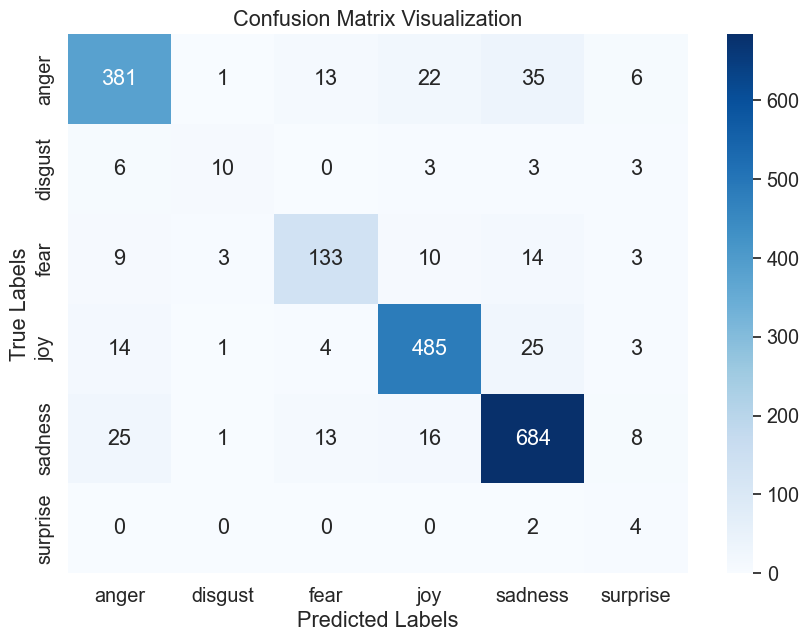

In [151]:
print("TF-IDF - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### BM-25

In [106]:
RF = train_model_BM_25((RandomForestClassifier()), X_train, y_train)

In [108]:
y_pred_RF=RF.predict(X_test)

In [109]:
print("BM25 - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

BM25 - Random Forest
Accuracy:  0.8154639175257732 

RF
              precision    recall  f1-score   support

       anger       0.75      0.83      0.79       458
     disgust       0.57      0.32      0.41        25
        fear       0.82      0.70      0.75       172
         joy       0.89      0.81      0.85       532
     sadness       0.84      0.86      0.85       747
    surprise       0.12      0.50      0.19         6

    accuracy                           0.82      1940
   macro avg       0.66      0.67      0.64      1940
weighted avg       0.82      0.82      0.82      1940

[[380   1   5  15  52   5]
 [ 12   8   0   1   2   2]
 [ 16   4 120  10  20   2]
 [ 36   1   7 430  51   7]
 [ 60   0  14  25 641   7]
 [  2   0   0   0   1   3]]


### Word2Vec

In [152]:
RF = train_model_word2vec((RandomForestClassifier()), X_train, y_train)

In [153]:
y_pred_RF=RF.predict(X_test)

Word2Vec - Random Forest
Accuracy:  0.7731958762886598 

RF
              precision    recall  f1-score   support

       anger       0.71      0.81      0.76       458
     disgust       1.00      0.28      0.44        25
        fear       0.67      0.62      0.64       172
         joy       0.88      0.79      0.84       532
     sadness       0.80      0.79      0.80       747
    surprise       0.07      0.50      0.13         6

    accuracy                           0.77      1940
   macro avg       0.69      0.63      0.60      1940
weighted avg       0.79      0.77      0.78      1940



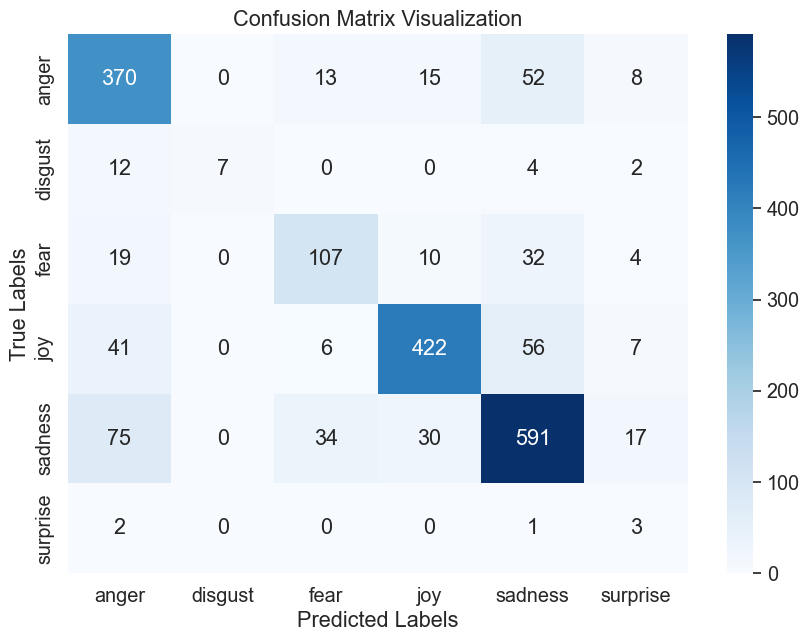

In [154]:
print("Word2Vec - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### Golve

In [155]:
RF = train_model_GloVe((RandomForestClassifier()), X_train, y_train)

In [156]:
y_pred_RF=RF.predict(X_test) 

Glove - Random Forest
Accuracy:  0.38556701030927837 

RF
              precision    recall  f1-score   support

       anger       0.17      0.01      0.02       458
     disgust       0.00      0.00      0.00        25
        fear       1.00      0.01      0.01       172
         joy       0.38      0.03      0.05       532
     sadness       0.39      0.97      0.56       747
    surprise       0.00      0.00      0.00         6

    accuracy                           0.39      1940
   macro avg       0.32      0.17      0.11      1940
weighted avg       0.38      0.39      0.23      1940



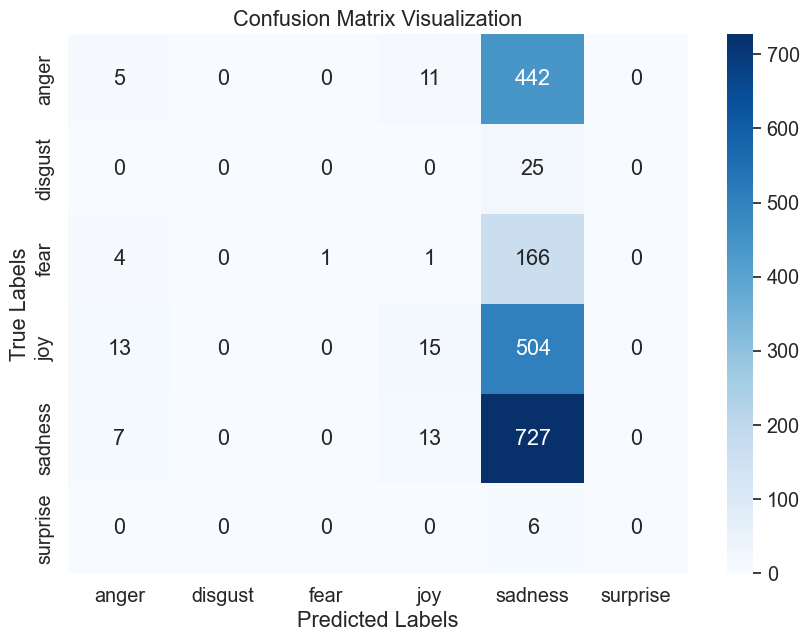

In [157]:
print("Glove - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### SVM model

#### TF-IDF

In [129]:
svm = train_model_IDF((SVC(kernel="poly")), X_train, y_train)

In [130]:
y_pred_svm = svm.predict(X_test)

TF-IDF - SVM
Accuracy: SVM 0.8902061855670103 

SVM
              precision    recall  f1-score   support

       anger       0.97      0.82      0.89       458
     disgust       1.00      0.44      0.61        25
        fear       0.98      0.68      0.80       172
         joy       0.96      0.91      0.93       532
     sadness       0.81      0.99      0.89       747
    surprise       0.80      0.67      0.73         6

    accuracy                           0.89      1940
   macro avg       0.92      0.75      0.81      1940
weighted avg       0.90      0.89      0.89      1940



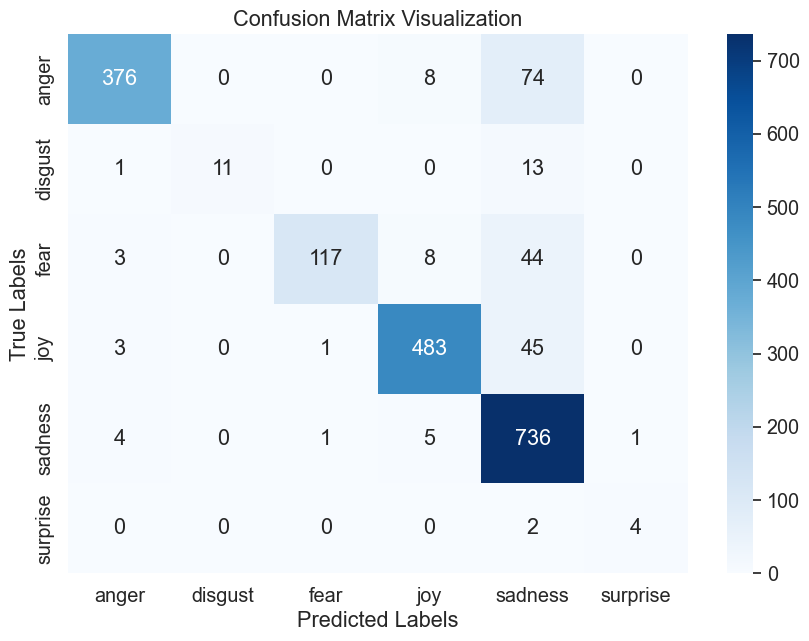

In [131]:
print("TF-IDF - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()


#### BM-25

In [146]:
svm = train_model_BM_25((SVC(kernel="poly")), X_train, y_train)

In [147]:
y_pred_svm = svm.predict(X_test)

BM-25 - SVM
Accuracy: SVM 0.7030927835051546 

SVM
              precision    recall  f1-score   support

       anger       0.89      0.51      0.65       458
     disgust       0.43      0.12      0.19        25
        fear       0.76      0.44      0.56       172
         joy       0.96      0.64      0.77       532
     sadness       0.59      0.95      0.73       747
    surprise       0.18      0.50      0.26         6

    accuracy                           0.70      1940
   macro avg       0.63      0.53      0.53      1940
weighted avg       0.77      0.70      0.70      1940



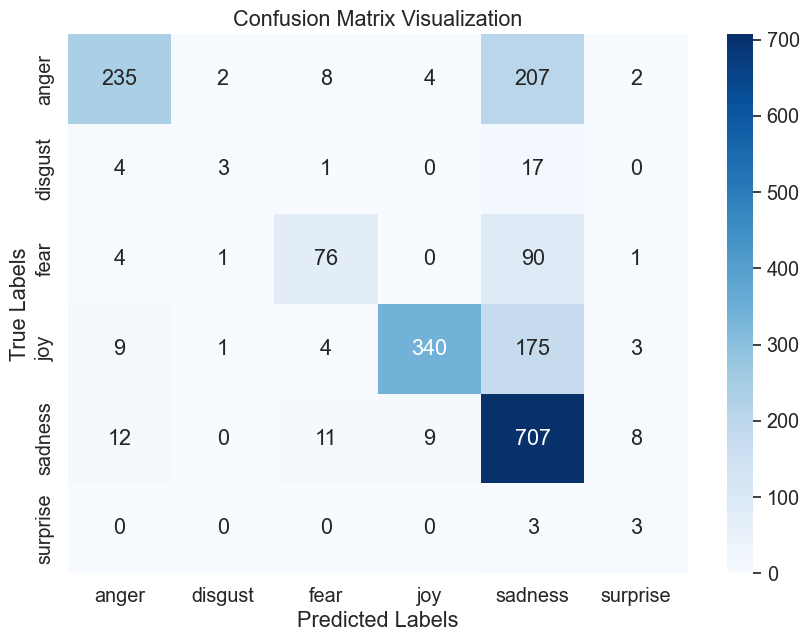

In [148]:
print("BM-25 - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()


#### Word2Vec

In [143]:
svm = train_model_word2vec((SVC(kernel="poly")), X_train, y_train)

In [144]:
y_pred_svm=svm.predict(X_test) 

Word2Vec - SVM
Accuracy: SVM 0.49123711340206183 

SVM
              precision    recall  f1-score   support

       anger       0.34      0.80      0.48       458
     disgust       0.00      0.00      0.00        25
        fear       0.29      0.06      0.10       172
         joy       0.86      0.48      0.61       532
     sadness       0.60      0.43      0.50       747
    surprise       0.00      0.00      0.00         6

    accuracy                           0.49      1940
   macro avg       0.35      0.30      0.28      1940
weighted avg       0.57      0.49      0.48      1940



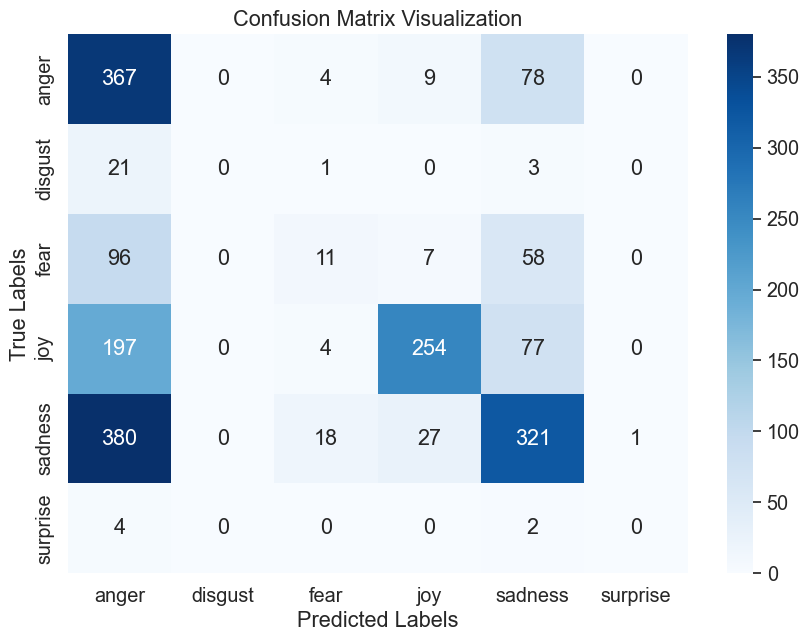

In [145]:
print("Word2Vec - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### Glove

In [132]:
svm = train_model_GloVe((SVC(kernel="poly")), X_train, y_train)

In [133]:
y_pred_svm=svm.predict(X_test) 

TF-IDF - SVM
Accuracy: SVM 0.3845360824742268 

SVM
              precision    recall  f1-score   support

       anger       0.14      0.01      0.02       458
     disgust       0.00      0.00      0.00        25
        fear       0.00      0.00      0.00       172
         joy       0.36      0.03      0.05       532
     sadness       0.39      0.97      0.56       747
    surprise       0.00      0.00      0.00         6

    accuracy                           0.38      1940
   macro avg       0.15      0.17      0.10      1940
weighted avg       0.28      0.38      0.23      1940



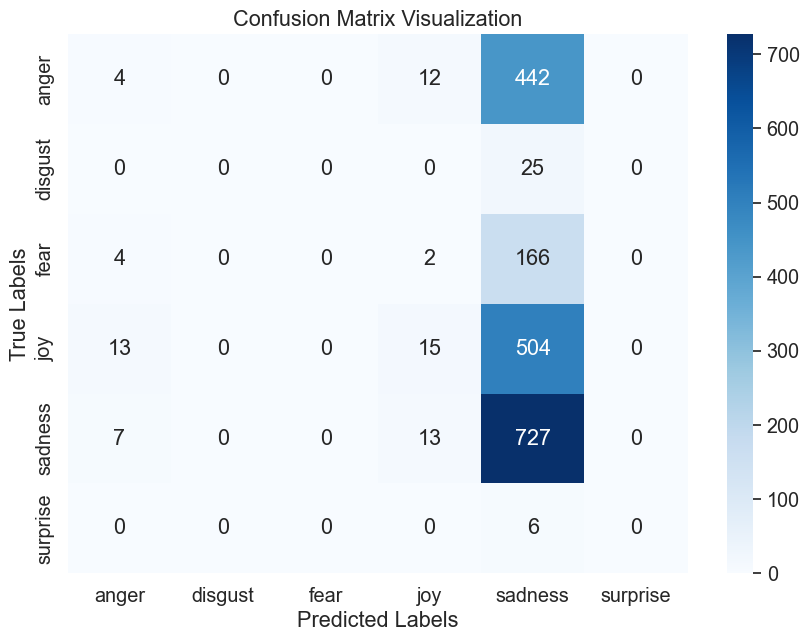

In [134]:
print("TF-IDF - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### KNN model

#### TF-IDF

In [135]:
knn = train_model_IDF((KNeighborsClassifier(n_neighbors=1, algorithm= 'brute', leaf_size = 5)), X_train, y_train)
y_pred_KNN = knn.predict(X_test)

TF-IDF - KNN
Accuracy: SVM 0.85 

SVM
              precision    recall  f1-score   support

       anger       0.98      0.79      0.88       458
     disgust       0.67      0.56      0.61        25
        fear       0.92      0.69      0.79       172
         joy       0.68      0.98      0.80       532
     sadness       0.97      0.84      0.90       747
    surprise       0.57      0.67      0.62         6

    accuracy                           0.85      1940
   macro avg       0.80      0.75      0.77      1940
weighted avg       0.88      0.85      0.85      1940



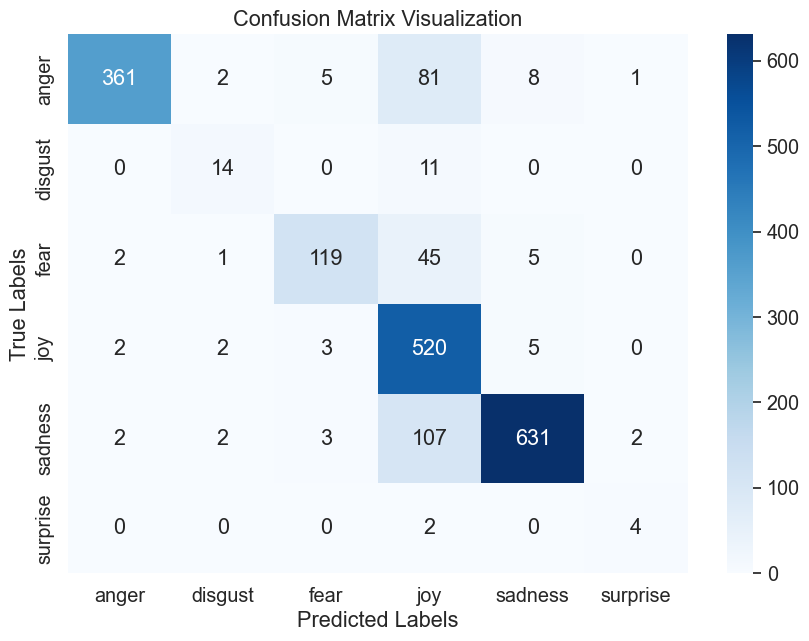

In [136]:
print("TF-IDF - KNN")
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
print('Accuracy: SVM', KNN_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_KNN))

cm = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### BM-25

In [137]:
knn = train_model_BM_25((KNeighborsClassifier(n_neighbors=1, algorithm= 'brute', leaf_size = 5)), X_train, y_train)
y_pred_KNN = knn.predict(X_test)

BM-25 - KNN
Accuracy: SVM 0.8134020618556701 

SVM
              precision    recall  f1-score   support

       anger       0.87      0.78      0.82       458
     disgust       0.46      0.48      0.47        25
        fear       0.73      0.74      0.73       172
         joy       0.81      0.86      0.83       532
     sadness       0.89      0.83      0.86       747
    surprise       0.06      0.67      0.11         6

    accuracy                           0.81      1940
   macro avg       0.64      0.73      0.64      1940
weighted avg       0.84      0.81      0.82      1940



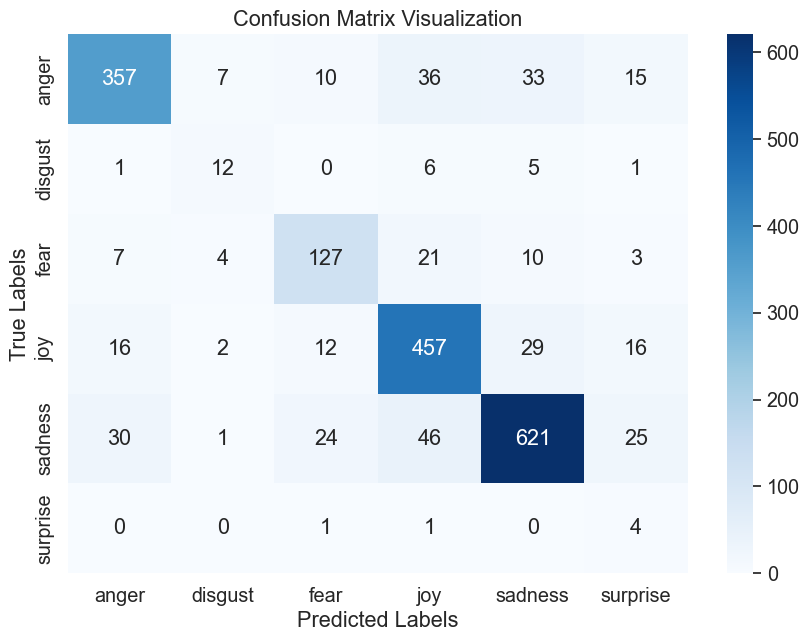

In [138]:
print("BM-25 - KNN")
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
print('Accuracy: SVM', KNN_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_KNN))

cm = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### Word2Vec

In [139]:
knn = train_model_word2vec((KNeighborsClassifier(n_neighbors=1, algorithm= 'brute', leaf_size = 5)), X_train, y_train)
y_pred_Word2Vec = knn.predict(X_test)

Word2Vec - KNN
Accuracy: SVM 0.7118556701030928 

SVM
              precision    recall  f1-score   support

       anger       0.69      0.74      0.72       458
     disgust       0.39      0.28      0.33        25
        fear       0.56      0.63      0.59       172
         joy       0.82      0.68      0.74       532
     sadness       0.78      0.75      0.77       747
    surprise       0.04      0.50      0.07         6

    accuracy                           0.71      1940
   macro avg       0.55      0.60      0.54      1940
weighted avg       0.74      0.71      0.72      1940



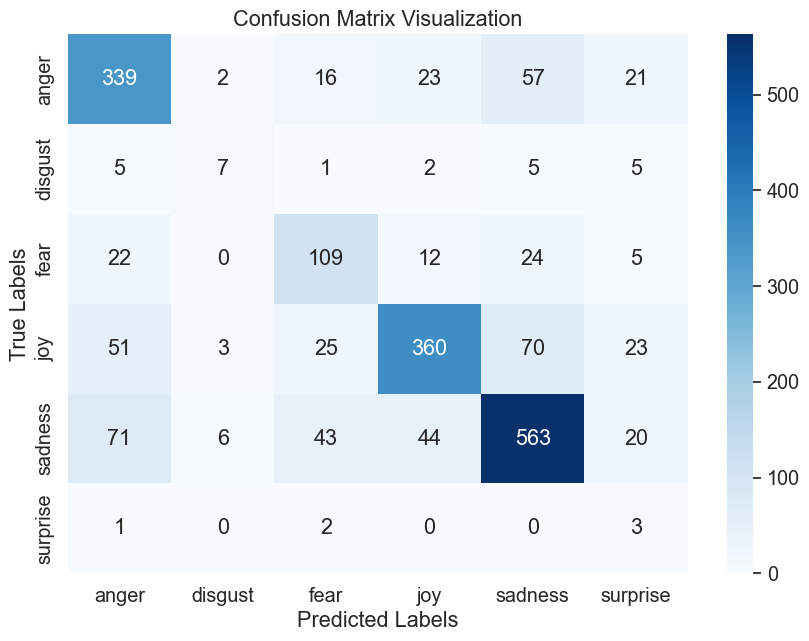

In [140]:
print("Word2Vec - KNN")
Word2Vec_accuracy = accuracy_score(y_test, y_pred_Word2Vec)
print('Accuracy: SVM', Word2Vec_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_Word2Vec))

cm = confusion_matrix(y_test, y_pred_Word2Vec)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### Glove

In [141]:
knn = train_model_GloVe((KNeighborsClassifier(n_neighbors=1, algorithm= 'brute', leaf_size = 5)), X_train, y_train)
y_pred_Glove = knn.predict(X_test)

Glove - KNN
Accuracy: SVM 0.2365979381443299 

SVM
              precision    recall  f1-score   support

       anger       0.24      0.95      0.38       458
     disgust       0.00      0.00      0.00        25
        fear       0.00      0.00      0.00       172
         joy       0.34      0.04      0.07       532
     sadness       0.19      0.01      0.01       747
    surprise       0.00      0.00      0.00         6

    accuracy                           0.24      1940
   macro avg       0.13      0.17      0.08      1940
weighted avg       0.22      0.24      0.11      1940



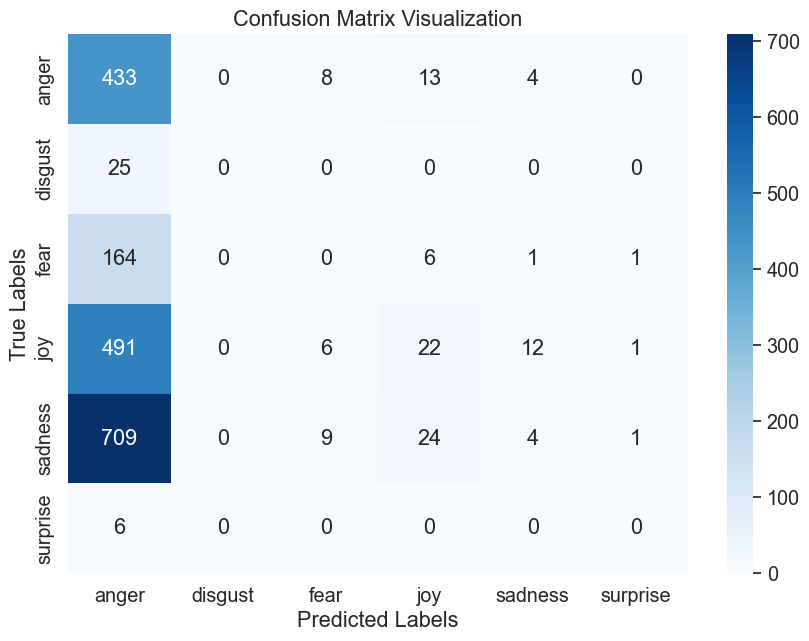

In [142]:
print("Glove - KNN")
Glove_accuracy = accuracy_score(y_test, y_pred_Glove)
print('Accuracy: SVM', Glove_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_Glove))

cm = confusion_matrix(y_test, y_pred_Glove)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### XGBoost

#### TF-IDF

In [ ]:
import xgboost as xgb

XGB = train_model_IDF((xgb.XGBClassifier()), X_train, y_train)

In [ ]:
y_pred_XGB = XGB.predict(X_test)

In [ ]:
print("TF-IDF - XGB")
XGB_accuracy = accuracy_score(y_test, y_pred_XGB)
print('Accuracy: SVM', XGB_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_XGB))

cm = confusion_matrix(y_test, y_pred_XGB)
plt.figure(figsize=(10, 7)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### Search for best hyper

In [127]:
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline([
    ('vect', TfidfVectorizer(encoding='utf-8')),
    ('clf', SVC())
])

# Define the parameter grid
param_grid = {
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__min_df': [1, 2, 3, 5],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3)],
    'vect__norm': ['l1', 'l2', None],  # Normalization applied to the TF-IDF
    'clf__C': [0.01, 0.1, 1, 10, 100, 1000],
    'clf__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'clf__gamma': ['scale', 'auto', 0.1, 1, 10],
    'clf__degree': [2, 3, 4]  # Degree of the polynomial kernel function
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Get the best score and parameters
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print("Best score: ", best_score)
print("Best parameters set:")
for param_name in sorted(best_params.keys()):
    print(f"{param_name}: {best_params[param_name]}")


Fitting 5 folds for each of 64800 candidates, totalling 324000 fits


KeyboardInterrupt: 

## For Fun :)

In [101]:
myTest=['ŸÖÿ®ÿ≥Ÿàÿ∑','ŸÖÿß ÿßÿ≠ÿ®ŸÉ',' ÿÆÿßŸäŸÅ','ŸÖÿ±ÿπŸàÿ® ÿπŸÜÿØŸä ÿßÿÆÿ™ÿ®ÿßÿ±ÿ±',"ÿπŸÜÿØŸä ÿßÿÆÿ™ÿ®ÿßÿ± ÿ®ŸÉÿ±Ÿá ŸàŸÖÿ™Ÿàÿ™ÿ± ŸÖÿß ÿ∞ÿßŸÉÿ±ÿ™","ŸÖÿ™ŸÅÿßÿ¨ÿ¶","ÿ≤ÿπŸÑÿßŸÜ ŸÖŸÜŸáŸÖ"] 

tt = pd.DataFrame(myTest, columns=['words'])

print(tt.words)

tt.words=tt.words.apply(lambda text : remove_stop_words(text))
tt.words=tt.words.apply(lambda text : normalizeArabic(text))
tt.words=tt.words.apply(lambda text : lemmatize_arabic_Iris(text))

print(tt.words)


y_pred=RF.predict(tt.words)
print()
print(y_pred)
print("=================")
print(f'',list(y_test),'\n')
for i in range(len(tt.words)):
    print(tt.words[i])
    print(y_pred[i])

0                               ŸÖÿ®ÿ≥Ÿàÿ∑
1                             ŸÖÿß ÿßÿ≠ÿ®ŸÉ
2                                ÿÆÿßŸäŸÅ
3                  ŸÖÿ±ÿπŸàÿ® ÿπŸÜÿØŸä ÿßÿÆÿ™ÿ®ÿßÿ±ÿ±
4    ÿπŸÜÿØŸä ÿßÿÆÿ™ÿ®ÿßÿ± ÿ®ŸÉÿ±Ÿá ŸàŸÖÿ™Ÿàÿ™ÿ± ŸÖÿß ÿ∞ÿßŸÉÿ±ÿ™
5                              ŸÖÿ™ŸÅÿßÿ¨ÿ¶
6                          ÿ≤ÿπŸÑÿßŸÜ ŸÖŸÜŸáŸÖ
Name: words, dtype: object
0                 ÿ®ÿ≥ÿ∑
1                 ÿßÿ≠ÿ®
2                 ÿÆŸäŸÅ
3          ÿ±ÿπÿ® ÿÆÿ™ÿ®ÿßÿ±ÿ±
4    ÿÆÿ®ÿ± ÿ®ŸÉÿ± ÿ™Ÿàÿ™ÿ± ÿ∞ŸÉÿ±
5                ŸÅÿßÿ¨ÿ°
6                 ÿ≤ÿπŸÑ
Name: words, dtype: object

['joy' 'joy' 'fear' 'fear' 'sadness' 'surprise' 'surprise']
 ['emotion'] 

ÿ®ÿ≥ÿ∑
joy
ÿßÿ≠ÿ®
joy
ÿÆŸäŸÅ
fear
ÿ±ÿπÿ® ÿÆÿ™ÿ®ÿßÿ±ÿ±
fear
ÿÆÿ®ÿ± ÿ®ŸÉÿ± ÿ™Ÿàÿ™ÿ± ÿ∞ŸÉÿ±
sadness
ŸÅÿßÿ¨ÿ°
surprise
ÿ≤ÿπŸÑ
surprise
